In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization, Embedding
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import mean_absolute_error
import optuna

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%whos

Variable              Type        Data/Info
-------------------------------------------
Adam                  type        <class 'keras.src.optimizers.adam.Adam'>
BatchNormalization    type        <class 'keras.src.layers.<...>tion.BatchNormalization'>
Conv1D                type        <class 'keras.src.layers.<...>olutional.conv1d.Conv1D'>
Dense                 type        <class 'keras.src.layers.core.dense.Dense'>
Dropout               type        <class 'keras.src.layers.<...>ization.dropout.Dropout'>
Embedding             type        <class 'keras.src.layers.<...>ore.embedding.Embedding'>
Flatten               type        <class 'keras.src.layers.<...>shaping.flatten.Flatten'>
LabelEncoder          type        <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
OneHotEncoder         type        <class 'sklearn.preproces<...>_encoders.OneHotEncoder'>
Sequential            type        <class 'keras.src.models.sequential.Sequential'>
StandardScaler        type        <class 'skle

In [3]:
dataset = pd.read_csv('C:/Users/admin/OneDrive/Dokumenty/CNN/dataset_paper_f_cleaned_minmax.csv')
#dataset_paper_final.csv

In [4]:
min_normalized = dataset.min()
max_normalized = dataset.max()
print(f"Range of normalized retention time: {min_normalized} to {max_normalized}")

Range of normalized retention time: sequence             AAAAAAAAAAAAAAAASAGGK
is_modified                          False
retention_time                         0.0
hydrophobicity                         0.0
aromaticity                            0.0
isoelectric_point                      0.0
molecular_weight                       0.0
instability_index                      0.0
cystein_count                          0.0
sequence_length                        0.0
dtype: object to sequence             YYYWVINPADSSGITPK
is_modified                       True
retention_time                     1.0
hydrophobicity                     1.0
aromaticity                        1.0
isoelectric_point                  1.0
molecular_weight                   1.0
instability_index                  1.0
cystein_count                      1.0
sequence_length                    1.0
dtype: object


In [5]:
#OneHot Encoding 
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
unique_chars = list(set(''.join(dataset['sequence'])))
one_hot_encoder.fit(np.array(unique_chars).reshape(-1, 1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [6]:
#emb_uniq = len(unique_chars) + 1  # Vocabulary size (+1 for padding)
#embedding_dim=50

In [7]:
encoded_sequences = [
    one_hot_encoder.transform(np.array(list(seq)).reshape(-1, 1)) for seq in dataset['sequence']
]

In [8]:
X = pad_sequences(encoded_sequences, maxlen=58, padding='post', dtype='float32')  # Adjust maxlen as needed
y = dataset['retention_time'].values  # Replace with your target column

In [9]:
from sklearn.model_selection import train_test_split
X_train_seq, X_test_seq, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
sequence_data = np.array(X)
sequence_data

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [11]:
print("X_train_seq shape:", X_train_seq.shape)
print("X_test_seq shape:", X_test_seq.shape)

X_train_seq shape: (357956, 58, 20)
X_test_seq shape: (89490, 58, 20)


In [13]:
x=np.array(sequence_data)
y=np.array(dataset['retention_time'])

In [14]:
#from sklearn.preprocessing import MinMaxScaler
# Normalize target data
#y_scaler = MinMaxScaler()
#y = y_scaler.fit_transform(y.reshape(-1, 1))

In [15]:
min_normalized = dataset.min()
max_normalized = dataset.max()
print(f"Range of normalized retention time: {min_normalized} to {max_normalized}")

Range of normalized retention time: sequence             AAAAAAAAAAAAAAAASAGGK
is_modified                          False
retention_time                         0.0
hydrophobicity                         0.0
aromaticity                            0.0
isoelectric_point                      0.0
molecular_weight                       0.0
instability_index                      0.0
cystein_count                          0.0
sequence_length                        0.0
dtype: object to sequence             YYYWVINPADSSGITPK
is_modified                       True
retention_time                     1.0
hydrophobicity                     1.0
aromaticity                        1.0
isoelectric_point                  1.0
molecular_weight                   1.0
instability_index                  1.0
cystein_count                      1.0
sequence_length                    1.0
dtype: object


In [16]:
X_train_seq, X_test_seq, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

Optuna Study 

In [46]:
# Define global variables
y_pred_original_global = None
y_test_original_global = None

def objective(trial):
    global y_pred_original_global, y_test_original_global  # Explicitly declare global BEFORE assignment

    # Random seeds for reproducibility
    r_number = 42
    np.random.seed(r_number)
    tf.random.set_seed(r_number)
    random.seed(r_number)

    # Fixed train-test split
    X_train_seq, X_test_seq, y_train, y_test = train_test_split(
         x, y, test_size=0.2, random_state=r_number
    )   

    # Store min and max values for denormalization
    min_value = dataset['retention_time'].min()
    max_value = dataset['retention_time'].max()

    # Hyperparameters to tune
    filters = trial.suggest_categorical('filters', [32, 64, 128, 256])
    kernel_size = trial.suggest_categorical('kernel_size', [3, 5, 7])
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
    units = trial.suggest_int('units', 32, 128, step=32)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32, 64])
    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'sgd', 'rmsprop'])

    # Dynamically assign optimizer
    optimizer = {
        'adam': Adam(learning_rate=learning_rate),
        'sgd': SGD(learning_rate=learning_rate),
        'rmsprop': RMSprop(learning_rate=learning_rate)
    }[optimizer_name]

    # Build the model
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
        BatchNormalization(),

        Conv1D(filters=filters * 2, kernel_size=kernel_size, activation='relu'),
        BatchNormalization(),

        Conv1D(filters=filters * 4, kernel_size=kernel_size, activation='relu'),
        BatchNormalization(),
        Flatten(),
        Dense(units=units, activation='relu'),
        Dropout(rate=dropout_rate),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    # Train the model
    history = model.fit(
        X_train_seq, y_train,
        validation_data=(X_test_seq, y_test),
        epochs=4,  # Use fewer epochs for tuning
        batch_size=min(batch_size, len(X_train_seq)),  # Ensure batch size is valid
        verbose=0
    )

    # Evaluate the model
    val_loss, val_mae = model.evaluate(X_test_seq, y_test, verbose=0)
    y_pred = model.predict(X_test_seq)

    # Use denormalization instead of y_scaler.inverse_transform
    y_pred_original_global = denormalize(y_pred, min_value, max_value)  # This was not updating the global variable
    y_test_original_global = denormalize(y_test, min_value, max_value)

    # Print inside function to verify it works
    print("Inside objective - y_pred_original_global:", y_pred_original_global[:5].flatten())
    print("Inside objective - y_test_original_global:", y_test_original_global[:5].flatten())

    # Return MAE for Optuna to minimize
    return mean_absolute_error(y_test_original_global, y_pred_original_global)



In [19]:
# Create the Optuna study
study = optuna.create_study(direction='minimize')  # We want to minimize validation MAE
study.optimize(objective, n_trials=50)  # Perform 10 trials

[I 2025-01-31 12:24:38,067] A new study created in memory with name: no-name-768aedc3-a5d4-4bdf-a2a5-4a788d4b329e


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


[I 2025-01-31 12:33:23,623] Trial 0 finished with value: 0.10149800873486596 and parameters: {'filters': 64, 'kernel_size': 5, 'dropout_rate': 0.4653384867723103, 'units': 32, 'learning_rate': 0.00048184389553750844, 'batch_size': 16, 'optimizer': 'sgd'}. Best is trial 0 with value: 0.10149800873486596.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 45s 16ms/step


[I 2025-01-31 13:33:43,182] Trial 1 finished with value: 0.17098619932937478 and parameters: {'filters': 256, 'kernel_size': 3, 'dropout_rate': 0.4940557437870605, 'units': 128, 'learning_rate': 0.0018220187950080148, 'batch_size': 16, 'optimizer': 'rmsprop'}. Best is trial 0 with value: 0.10149800873486596.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step


[I 2025-01-31 14:08:50,819] Trial 2 finished with value: 0.1451059924273372 and parameters: {'filters': 256, 'kernel_size': 3, 'dropout_rate': 0.4222119005497712, 'units': 32, 'learning_rate': 1.0372738230760607e-05, 'batch_size': 32, 'optimizer': 'sgd'}. Best is trial 0 with value: 0.10149800873486596.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 54s 19ms/step


[I 2025-01-31 15:09:44,315] Trial 3 finished with value: 0.10658905331114456 and parameters: {'filters': 256, 'kernel_size': 5, 'dropout_rate': 0.40462424890362975, 'units': 32, 'learning_rate': 0.0004451649393564642, 'batch_size': 16, 'optimizer': 'rmsprop'}. Best is trial 0 with value: 0.10149800873486596.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 15:12:44,765] Trial 4 finished with value: 0.05470177808931315 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.2413791189519158, 'units': 96, 'learning_rate': 7.80152959348808e-05, 'batch_size': 64, 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.05470177808931315.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 66s 24ms/step


[I 2025-01-31 16:19:08,281] Trial 5 finished with value: 0.13336085420349403 and parameters: {'filters': 256, 'kernel_size': 7, 'dropout_rate': 0.347637014705241, 'units': 96, 'learning_rate': 1.5141969337381378e-05, 'batch_size': 16, 'optimizer': 'sgd'}. Best is trial 4 with value: 0.05470177808931315.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 16:22:44,526] Trial 6 finished with value: 0.12141696869176465 and parameters: {'filters': 32, 'kernel_size': 5, 'dropout_rate': 0.48643362086245867, 'units': 32, 'learning_rate': 0.00067632104096987, 'batch_size': 32, 'optimizer': 'sgd'}. Best is trial 4 with value: 0.05470177808931315.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 16:25:44,663] Trial 7 finished with value: 0.17126685086443502 and parameters: {'filters': 32, 'kernel_size': 3, 'dropout_rate': 0.4269600804163299, 'units': 96, 'learning_rate': 0.009058623435209055, 'batch_size': 64, 'optimizer': 'adam'}. Best is trial 4 with value: 0.05470177808931315.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


[I 2025-01-31 16:40:49,823] Trial 8 finished with value: 0.11960142056200929 and parameters: {'filters': 64, 'kernel_size': 3, 'dropout_rate': 0.43292845493482024, 'units': 64, 'learning_rate': 0.00101038228783249, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.05470177808931315.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


[I 2025-01-31 16:47:44,170] Trial 9 finished with value: 0.09596693382830594 and parameters: {'filters': 64, 'kernel_size': 5, 'dropout_rate': 0.2352885901181618, 'units': 96, 'learning_rate': 0.0005148758098812098, 'batch_size': 32, 'optimizer': 'sgd'}. Best is trial 4 with value: 0.05470177808931315.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step


[I 2025-01-31 17:06:11,013] Trial 10 finished with value: 0.05645512157930468 and parameters: {'filters': 128, 'kernel_size': 7, 'dropout_rate': 0.2197949714615025, 'units': 128, 'learning_rate': 7.574740200511993e-05, 'batch_size': 64, 'optimizer': 'adam'}. Best is trial 4 with value: 0.05470177808931315.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step


[I 2025-01-31 17:24:47,660] Trial 11 finished with value: 0.0604825603396277 and parameters: {'filters': 128, 'kernel_size': 7, 'dropout_rate': 0.20394382973861772, 'units': 128, 'learning_rate': 7.377660067565041e-05, 'batch_size': 64, 'optimizer': 'adam'}. Best is trial 4 with value: 0.05470177808931315.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step


[I 2025-01-31 17:43:11,341] Trial 12 finished with value: 0.05967381111353355 and parameters: {'filters': 128, 'kernel_size': 7, 'dropout_rate': 0.2786069369418844, 'units': 128, 'learning_rate': 8.95121008206478e-05, 'batch_size': 64, 'optimizer': 'adam'}. Best is trial 4 with value: 0.05470177808931315.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step


[I 2025-01-31 18:00:22,029] Trial 13 finished with value: 0.0630033855500564 and parameters: {'filters': 128, 'kernel_size': 7, 'dropout_rate': 0.2878160110874784, 'units': 64, 'learning_rate': 8.68059119180726e-05, 'batch_size': 64, 'optimizer': 'adam'}. Best is trial 4 with value: 0.05470177808931315.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 18:03:31,719] Trial 14 finished with value: 0.05610595475789889 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.27718453521376746, 'units': 128, 'learning_rate': 3.547172427578407e-05, 'batch_size': 64, 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.05470177808931315.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 18:14:03,059] Trial 15 finished with value: 0.05384018768993053 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.2866445617653473, 'units': 96, 'learning_rate': 2.8564772487742237e-05, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 18:23:30,624] Trial 16 finished with value: 0.0712033359001404 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.3393437850577492, 'units': 64, 'learning_rate': 0.00020193173051769685, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 18:33:57,880] Trial 17 finished with value: 0.054098886744401234 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.25193900372357786, 'units': 96, 'learning_rate': 2.5445274156846498e-05, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 18:44:25,563] Trial 18 finished with value: 0.05554009241936716 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.3132925161666996, 'units': 96, 'learning_rate': 2.627597705306185e-05, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 18:53:59,487] Trial 19 finished with value: 0.06558217467424284 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.3750382205525363, 'units': 64, 'learning_rate': 2.6761290289152413e-05, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 19:04:21,588] Trial 20 finished with value: 0.07896402424107046 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.2529282422280201, 'units': 96, 'learning_rate': 0.00016320146609148412, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 19:14:48,177] Trial 21 finished with value: 0.05768120752769246 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.25378201955808116, 'units': 96, 'learning_rate': 5.003227930786597e-05, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 19:25:14,198] Trial 22 finished with value: 0.056982052832421075 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.30543382707018596, 'units': 96, 'learning_rate': 1.7959429421391677e-05, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 19:35:35,970] Trial 23 finished with value: 0.0701210605003366 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.24842955827725405, 'units': 96, 'learning_rate': 0.00016944013175678816, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 19:45:12,151] Trial 24 finished with value: 0.05851715224731439 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.20002769516332883, 'units': 64, 'learning_rate': 4.3088968455960816e-05, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 19:55:41,536] Trial 25 finished with value: 0.06014319248377244 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.3164296812396572, 'units': 96, 'learning_rate': 1.0277983374013268e-05, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 19:58:31,635] Trial 26 finished with value: 0.058135860859007266 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.23188919777814448, 'units': 64, 'learning_rate': 4.9322917201436336e-05, 'batch_size': 64, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 20:02:46,319] Trial 27 finished with value: 0.060361931175188316 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.27199023467089034, 'units': 96, 'learning_rate': 2.1069610972081922e-05, 'batch_size': 32, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


[I 2025-01-31 20:21:12,586] Trial 28 finished with value: 0.06468937332835216 and parameters: {'filters': 64, 'kernel_size': 3, 'dropout_rate': 0.33138783967087854, 'units': 128, 'learning_rate': 0.00027678875969876845, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


[I 2025-01-31 20:31:25,323] Trial 29 finished with value: 0.056171718858777586 and parameters: {'filters': 64, 'kernel_size': 5, 'dropout_rate': 0.37343813032277146, 'units': 96, 'learning_rate': 0.00010224159446785974, 'batch_size': 16, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 20:34:10,214] Trial 30 finished with value: 0.17770397837147303 and parameters: {'filters': 32, 'kernel_size': 5, 'dropout_rate': 0.29311641115382175, 'units': 64, 'learning_rate': 3.084775014068617e-05, 'batch_size': 64, 'optimizer': 'sgd'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 20:44:46,959] Trial 31 finished with value: 0.05790954728506473 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.2627479365630395, 'units': 96, 'learning_rate': 1.6360010954010295e-05, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 20:55:19,186] Trial 32 finished with value: 0.054727748482999834 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.31401429743950376, 'units': 96, 'learning_rate': 2.4537135615981633e-05, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 21:05:45,754] Trial 33 finished with value: 0.06408912559367524 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.30067861076931396, 'units': 96, 'learning_rate': 5.8070828636096295e-05, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 45s 16ms/step


[I 2025-01-31 22:37:30,871] Trial 34 finished with value: 0.07127598079788414 and parameters: {'filters': 256, 'kernel_size': 3, 'dropout_rate': 0.36872210066489264, 'units': 128, 'learning_rate': 1.4557176614570819e-05, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 64s 23ms/step


[I 2025-01-31 23:54:57,627] Trial 35 finished with value: 0.08041209198240058 and parameters: {'filters': 256, 'kernel_size': 7, 'dropout_rate': 0.22724824411805988, 'units': 96, 'learning_rate': 0.00011866875977065696, 'batch_size': 16, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-01-31 23:58:49,703] Trial 36 finished with value: 0.07563555763081253 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.3257067163566322, 'units': 96, 'learning_rate': 0.004453035652977618, 'batch_size': 32, 'optimizer': 'sgd'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step


[I 2025-02-01 00:07:57,604] Trial 37 finished with value: 0.06066624065771326 and parameters: {'filters': 32, 'kernel_size': 5, 'dropout_rate': 0.243113215805919, 'units': 128, 'learning_rate': 1.3136285167142034e-05, 'batch_size': 16, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step


[I 2025-02-01 01:32:00,219] Trial 38 finished with value: 0.06783575333972462 and parameters: {'filters': 256, 'kernel_size': 3, 'dropout_rate': 0.2171156685727504, 'units': 96, 'learning_rate': 3.465324106465364e-05, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-02-01 01:40:19,895] Trial 39 finished with value: 0.14898496658476845 and parameters: {'filters': 32, 'kernel_size': 7, 'dropout_rate': 0.2651053895407725, 'units': 32, 'learning_rate': 2.362160950971323e-05, 'batch_size': 8, 'optimizer': 'sgd'}. Best is trial 15 with value: 0.05384018768993053.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


[I 2025-02-01 01:47:33,428] Trial 40 finished with value: 0.052491838362408554 and parameters: {'filters': 64, 'kernel_size': 7, 'dropout_rate': 0.2865515875071998, 'units': 64, 'learning_rate': 0.001454220582305921, 'batch_size': 32, 'optimizer': 'rmsprop'}. Best is trial 40 with value: 0.052491838362408554.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


[I 2025-02-01 01:54:41,394] Trial 41 finished with value: 0.1710395993633787 and parameters: {'filters': 64, 'kernel_size': 7, 'dropout_rate': 0.28714115387289896, 'units': 64, 'learning_rate': 0.004923954366398565, 'batch_size': 32, 'optimizer': 'rmsprop'}. Best is trial 40 with value: 0.052491838362408554.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


[I 2025-02-01 02:01:50,261] Trial 42 finished with value: 0.07254355374358612 and parameters: {'filters': 64, 'kernel_size': 7, 'dropout_rate': 0.3557311773304351, 'units': 64, 'learning_rate': 0.0011891600062363876, 'batch_size': 32, 'optimizer': 'rmsprop'}. Best is trial 40 with value: 0.052491838362408554.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step


[I 2025-02-01 02:09:31,512] Trial 43 finished with value: 0.06303722256041855 and parameters: {'filters': 64, 'kernel_size': 7, 'dropout_rate': 0.2661127360024917, 'units': 96, 'learning_rate': 0.001623569864427881, 'batch_size': 32, 'optimizer': 'rmsprop'}. Best is trial 40 with value: 0.052491838362408554.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


[I 2025-02-01 02:16:30,287] Trial 44 finished with value: 0.0865208368484953 and parameters: {'filters': 64, 'kernel_size': 7, 'dropout_rate': 0.3043062994916629, 'units': 32, 'learning_rate': 0.00038150792298123534, 'batch_size': 32, 'optimizer': 'adam'}. Best is trial 40 with value: 0.052491838362408554.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step


[I 2025-02-01 02:33:24,957] Trial 45 finished with value: 0.1712297767953445 and parameters: {'filters': 128, 'kernel_size': 7, 'dropout_rate': 0.39429330770810456, 'units': 64, 'learning_rate': 0.003913041387012829, 'batch_size': 64, 'optimizer': 'rmsprop'}. Best is trial 40 with value: 0.052491838362408554.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


[I 2025-02-01 02:40:34,704] Trial 46 finished with value: 0.17100393531174282 and parameters: {'filters': 64, 'kernel_size': 3, 'dropout_rate': 0.4453962581168559, 'units': 96, 'learning_rate': 0.0025890559992166, 'batch_size': 32, 'optimizer': 'adam'}. Best is trial 40 with value: 0.052491838362408554.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-02-01 02:43:47,375] Trial 47 finished with value: 0.10498883073547831 and parameters: {'filters': 32, 'kernel_size': 5, 'dropout_rate': 0.2845792782223126, 'units': 96, 'learning_rate': 0.0007710063894883357, 'batch_size': 64, 'optimizer': 'rmsprop'}. Best is trial 40 with value: 0.052491838362408554.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step


[I 2025-02-01 03:07:43,655] Trial 48 finished with value: 0.12257886542397364 and parameters: {'filters': 128, 'kernel_size': 7, 'dropout_rate': 0.3222361026908638, 'units': 64, 'learning_rate': 6.357717067552557e-05, 'batch_size': 16, 'optimizer': 'sgd'}. Best is trial 40 with value: 0.052491838362408554.


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 66s 24ms/step


[I 2025-02-01 05:01:04,200] Trial 49 finished with value: 0.06437795783635324 and parameters: {'filters': 256, 'kernel_size': 7, 'dropout_rate': 0.21405739192457662, 'units': 96, 'learning_rate': 3.768724208489661e-05, 'batch_size': 8, 'optimizer': 'rmsprop'}. Best is trial 40 with value: 0.052491838362408554.


In [20]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(study.best_params)

Best Hyperparameters:
{'filters': 64, 'kernel_size': 7, 'dropout_rate': 0.2865515875071998, 'units': 64, 'learning_rate': 0.001454220582305921, 'batch_size': 32, 'optimizer': 'rmsprop'}


In [21]:
#from tensorflow.keras.optimizers import SGD
# Train and evaluate the best model
best_trial = study.best_params

#embending dimensions
#emb_uniq = len(label_encoder.classes_)
#embedding_dim = 50

best_model = Sequential([
    #Embedding layer
    #Embedding(input_dim = emb_uniq, output_dim = embedding_dim, input_length = 58), #58 = longest sequence

    #Using best parameters
    Conv1D(filters=best_trial['filters'], kernel_size=best_trial['kernel_size'], activation='relu', input_shape=(58, 20)),
    BatchNormalization(),

    Conv1D(filters=best_trial['filters']*2, kernel_size=best_trial['kernel_size'], activation='relu', input_shape=(58, 20)),
    BatchNormalization(),

    Conv1D(filters=best_trial['filters']*4, kernel_size=best_trial['kernel_size'], activation='relu', input_shape=(58, 20)),
    BatchNormalization(),

    Flatten(),
    
    Dense(units=best_trial['units'], activation='relu'),
    Dropout(rate=best_trial['dropout_rate']),
    Dense(1, activation='linear')
])
best_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=best_trial['learning_rate']),
    loss='mean_squared_error',
    metrics=['mae']
)


best_model.build(input_shape=(None, 58,20))

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
best_model.summary()

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_150 (Conv1D)             │ (None, 52, 64)         │         9,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_150         │ (None, 52, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_151 (Conv1D)             │ (None, 46, 128)        │        57,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_151         │ (None, 46, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_152 (Conv1D)             │ (None, 40, 256)        │       229,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_152         │ (None, 40, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_50 (Flatten)            │ (None, 10240)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 64)             │       655,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 953,409 (3.64 MB)

 Trainable params: 952,513 (3.63 MB)

 Non-trainable params: 896 (3.50 KB)

In [24]:
print("X_train_seq shape:", X_train_seq.shape)
print("X_test_seq shape:", X_test_seq.shape)
print("Model input shape:", best_model.input_shape)


X_train_seq shape: (357956, 58, 20)
X_test_seq shape: (89490, 58, 20)
Model input shape: (None, 58, 20)


In [25]:
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',          # Monitor validation loss
    patience=10,                 # Number of epochs with no improvement before stopping
    restore_best_weights=True,   # Restore the best weights after stopping
    min_delta=0.00001              # Minimum change in the monitored value to qualify as an improvement
)

# Train the best model on the full training data with early stopping
history = best_model.fit(
    X_train_seq, y_train,
    validation_data=(X_test_seq, y_test),
    epochs=200,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]  # Add the early stopping callback
)

# Evaluate the best model
test_loss, test_mae = best_model.evaluate(X_test_seq, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Revert predictions to the original scale for analysis (if scaled during preprocessing)
y_test_pred = best_model.predict(X_test_seq)

# Uncomment and use this if your data was scaled:
# y_test_pred_original = y_scaler.inverse_transform(y_test_pred)


Epoch 1/200
11187/11187 ━━━━━━━━━━━━━━━━━━━━ 103s 9ms/step - loss: 0.0777 - mae: 0.1727 - val_loss: 0.0183 - val_mae: 0.1067
Epoch 2/200
11187/11187 ━━━━━━━━━━━━━━━━━━━━ 102s 9ms/step - loss: 0.0206 - mae: 0.1129 - val_loss: 0.0155 - val_mae: 0.0963
Epoch 3/200
11187/11187 ━━━━━━━━━━━━━━━━━━━━ 102s 9ms/step - loss: 0.0178 - mae: 0.1036 - val_loss: 0.0135 - val_mae: 0.0874
Epoch 4/200
11187/11187 ━━━━━━━━━━━━━━━━━━━━ 102s 9ms/step - loss: 0.0165 - mae: 0.0983 - val_loss: 0.0125 - val_mae: 0.0826
Epoch 5/200
11187/11187 ━━━━━━━━━━━━━━━━━━━━ 102s 9ms/step - loss: 0.0155 - mae: 0.0943 - val_loss: 0.0118 - val_mae: 0.0793
Epoch 6/200
11187/11187 ━━━━━━━━━━━━━━━━━━━━ 102s 9ms/step - loss: 0.0147 - mae: 0.0908 - val_loss: 0.0113 - val_mae: 0.0766
Epoch 7/200
11187/11187 ━━━━━━━━━━━━━━━━━━━━ 102s 9ms/step - loss: 0.0142 - mae: 0.0886 - val_loss: 0.0109 - val_mae: 0.0744
Epoch 8/200
11187/11187 ━━━━━━━━━━━━━━━━━━━━ 102s 9ms/step - loss: 0.0139 - mae: 0.0868 - val_loss: 0.0105 - val_mae: 0.0722


In [26]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [40]:
best_model.save("final_model.h5")
print("Final model saved successfully!")


Final model saved successfully!


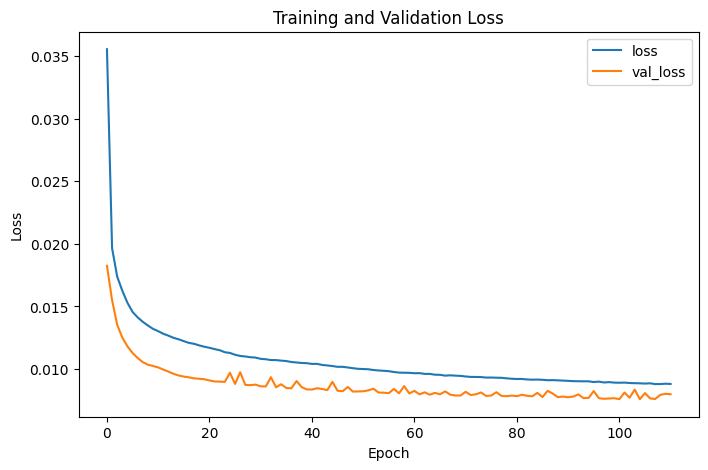

In [27]:
# Step 10: Visualize Training History
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.show()

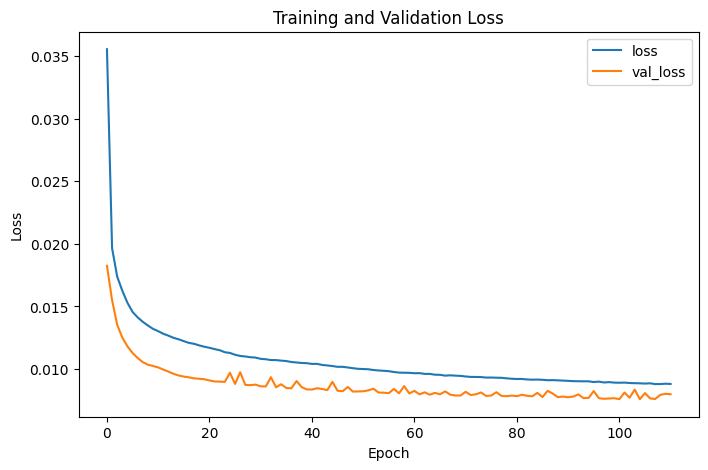

In [28]:
# Step 10: Visualize Training History
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.show()

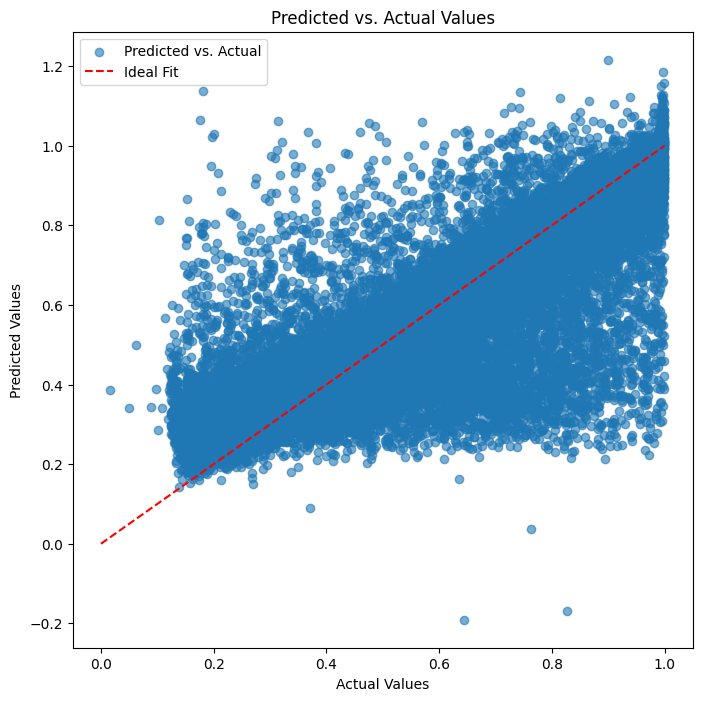

In [29]:
# Plot Predicted vs Actual Values
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred, alpha=0.6, label='Predicted vs. Actual')
plt.plot([0, 1], [0, 1], 'r--', label='Ideal Fit')  # Adjust range for normalized values
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

In [36]:
print(y_test_pred)

[[0.609444  ]
 [0.6773716 ]
 [0.85885715]
 ...
 [0.391172  ]
 [0.4313335 ]
 [0.56076205]]


In [49]:
print("Min of y_pred:", y_pred.min())
print("Max of y_pred:", y_pred.max())


Min of y_pred: -0.19088101
Max of y_pred: 1.215973


In [56]:
# Ensure you have loaded the trained model
from tensorflow.keras.models import load_model
import numpy as np

# Load the best trained model
best_model = load_model("final_model.h5")  # Change filename if needed

# Ensure test data is available
print("Shape of X_test_seq:", X_test_seq.shape)

# Make predictions
y_pred = best_model.predict(X_test_seq)

# Print raw predictions range before denormalization
print("Raw y_pred min:", y_pred.min(), "Raw y_pred max:", y_pred.max())

# 🔥 Fix: Clip y_pred to ensure it's in the valid [0,1] range before denormalizing
y_pred_clipped = np.clip(y_pred, 0, 1)

# 🔥 Use correct original retention time scale
original_min = 0.0343385
original_max = 60.026

# 🔥 Apply proper denormalization using the original scale
y_pred_original = y_pred_clipped * (original_max - original_min) + original_min

# Make `y_pred_original` available globally
global y_pred_original_global
y_pred_original_global = y_pred_original

# Print a few values to confirm correctness
print("First few denormalized predictions:", y_pred_original_global[:5].flatten())
print("Denormalized Predictions Range: Min =", y_pred_original_global.min(), "Max =", y_pred_original_global.max())




Shape of X_test_seq: (89490, 58, 20)
2797/2797 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step
Raw y_pred min: -0.19088101 Raw y_pred max: 1.215973
First few denormalized predictions: [36.595898 40.67099  51.55861  18.803268 39.86627 ]
Denormalized Predictions Range: Min = 0.0343385 Max = 60.026


In [70]:
# Save only the model weights correctly
best_model.save_weights("final_model.weights.h5")


from tensorflow.keras.models import load_model

# Load the saved model architecture
best_model = load_model("final_model.h5")

# Load the saved weights to restore exact parameters
best_model.load_weights("final_model.weights.h5")

print("Model architecture and weights reloaded successfully!")



Model architecture and weights reloaded successfully!


In [72]:
### 3️⃣ Recompile the Model with Correct Optimizer ###
optimizer = RMSprop(learning_rate=0.001454220582305921)  # Use exact LR from Optuna
best_model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["mae"])

print("✅ Model recompiled with RMSprop optimizer!")

### 4️⃣ Stabilize Batch Normalization Layers (If Used) ###
_ = best_model.predict(X_test_seq[:1])  # Warm-up pass to stabilize batch norm

print("✅ Model warmed up for inference!")

### 5️⃣ Make Predictions Again ###
y_pred = best_model.predict(X_test_seq)

### 6️⃣ Clip Predictions to [0,1] Before Denormalizing ###
y_pred_clipped = np.clip(y_pred, 0, 1)

### 7️⃣ Apply Proper Denormalization ###
original_min = 0.0343385
original_max = 60.026
y_pred_original = y_pred_clipped * (original_max - original_min) + original_min

### 8️⃣ Print Final Verification ###
print("🚀 Denormalized Predictions:")
print("   Min =", y_pred_original.min())
print("   Max =", y_pred_original.max())
print("   First few predictions:", y_pred_original[:5].flatten())

print("✅ Predictions fully restored and denormalized!")

✅ Model recompiled with RMSprop optimizer!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
✅ Model warmed up for inference!
2797/2797 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step
🚀 Denormalized Predictions:
   Min = 0.0343385
   Max = 60.026
   First few predictions: [36.595898 40.67099  51.55861  18.803268 39.86627 ]
✅ Predictions fully restored and denormalized!


In [73]:
print(y_pred_original_global)

[36.595898 40.67099  51.55861  ... 23.501396 25.910751 33.67539 ]


In [55]:
print("Min retention time:", dataset['retention_time'].min())
print("Max retention time:", dataset['retention_time'].max())


Min retention time: 0.0
Max retention time: 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
2797/2797 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step
✅ `y_pred_original_global` Range: Min = 0.0343385 Max = 60.026
✅ Applied correct denormalization to `y_test_original_global`
Final Shapes → y_test: (89490,) , y_pred: (89490,)
✅ `y_test_original_global` and `y_pred_original_global` are correctly shaped!


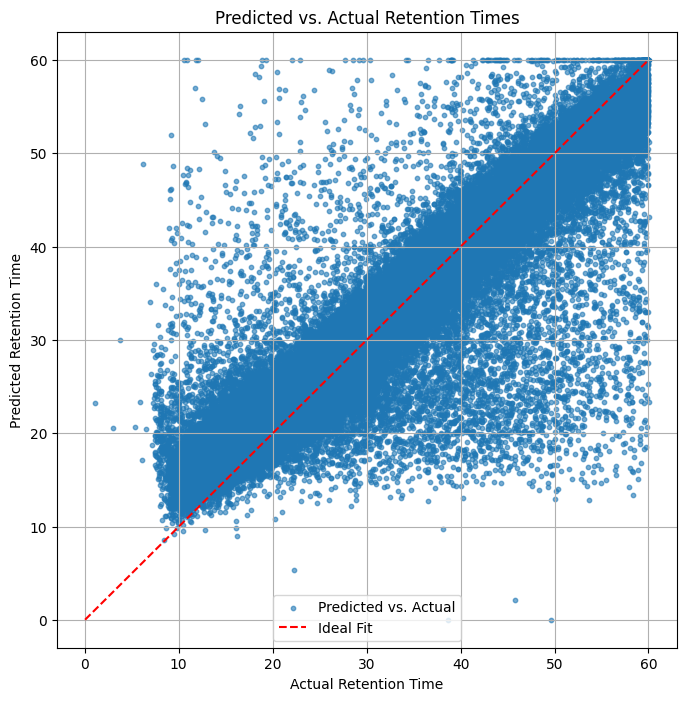

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop

### 🔥 Step 1: Load and Recompile the Model
best_model = load_model("final_model.h5")

# Recompile with the correct optimizer settings
optimizer = RMSprop(learning_rate=0.001454220582305921)  # Use exact LR from Optuna
best_model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["mae"])

# Warm-up prediction to stabilize BatchNorm layers
_ = best_model.predict(X_test_seq[:32])

### 🔥 Step 2: Generate Predictions
y_pred = best_model.predict(X_test_seq)

# Clip predictions to [0,1] before denormalizing
y_pred_clipped = np.clip(y_pred, 0, 1)

# ✅ Correct Original Retention Time Scale
original_min = 0.0343385
original_max = 60.026

# ✅ Apply Correct Denormalization to Predictions
y_pred_original = y_pred_clipped * (original_max - original_min) + original_min

# ✅ Store Globally and **Fix Shape**
global y_pred_original_global
y_pred_original_global = y_pred_original.squeeze()  # 🚀 FIXED SHAPE

print("✅ `y_pred_original_global` Range: Min =", y_pred_original_global.min(), "Max =", y_pred_original_global.max())

### 🔥 Step 3: Fix `y_test_original_global`
# ✅ Ensure `y_test_original_global` is properly assigned using `y_test`
y_test_original_global = np.array(y_test).flatten()

# 🔥 FIX: Apply denormalization only if `y_test_original_global` is in [0,1]
if y_test_original_global.max() <= 1.0:
    y_test_original_global = y_test_original_global * (original_max - original_min) + original_min
    print("✅ Applied correct denormalization to `y_test_original_global`")
else:
    print("✅ `y_test_original_global` is already in the original retention time scale")

# ✅ Ensure final shape is correct
y_test_original_global = y_test_original_global.squeeze()
y_pred_original_global = y_pred_original_global.squeeze()

# 🚀 Verify shapes
print("Final Shapes → y_test:", y_test_original_global.shape, ", y_pred:", y_pred_original_global.shape)

# ✅ Final Shape Check
if y_test_original_global.shape != y_pred_original_global.shape:
    raise ValueError(f"❌ Final Shape Mismatch: y_test has shape {y_test_original_global.shape}, "
                     f"but y_pred has shape {y_pred_original_global.shape}")

print("✅ `y_test_original_global` and `y_pred_original_global` are correctly shaped!")

### 🔥 Step 4: Generate the Scatter Plot
# ✅ Determine Correct Min/Max Range for the Ideal Fit Line (y = x)
min_value = min(y_test_original_global.min(), y_pred_original_global.min())
max_value = max(y_test_original_global.max(), y_pred_original_global.max())

plt.figure(figsize=(8, 8))
plt.scatter(y_test_original_global, y_pred_original_global, alpha=0.6, label="Predicted vs. Actual", s=10)
plt.plot([min_value, max_value], [min_value, max_value], 'r--', label="Ideal Fit")  # Correct range

plt.xlabel("Actual Retention Time")
plt.ylabel("Predicted Retention Time")
plt.title("Predicted vs. Actual Retention Times")
plt.legend()
plt.grid(True)
plt.show()






🚀 Loading the latest saved model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
✅ Model loaded and warmed up successfully!
2797/2797 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step
✅ Predictions generated and stored successfully!
✅ `y_test_original_global` is already in the original scale. No extra denormalization applied.

🔥 Checking Min/Max Values Before vs. After Reloading Model

🚀 Training Phase Min/Max (Before Saving Model)
✅ Min Actual: 1.0473749999999988 | Max Actual: 60.01350000000001
✅ Min Predicted: 0.0343385 | Max Predicted: 60.026

🔥 Post-Reloading Min/Max (After Loading Model)
✅ Min Actual: 1.0473749999999988 | Max Actual: 60.01350000000001
✅ Min Predicted: 0.03433850035071373 | Max Predicted: 60.0260009765625

✅ Model reloaded correctly! 🎉 Predictions remain the same.


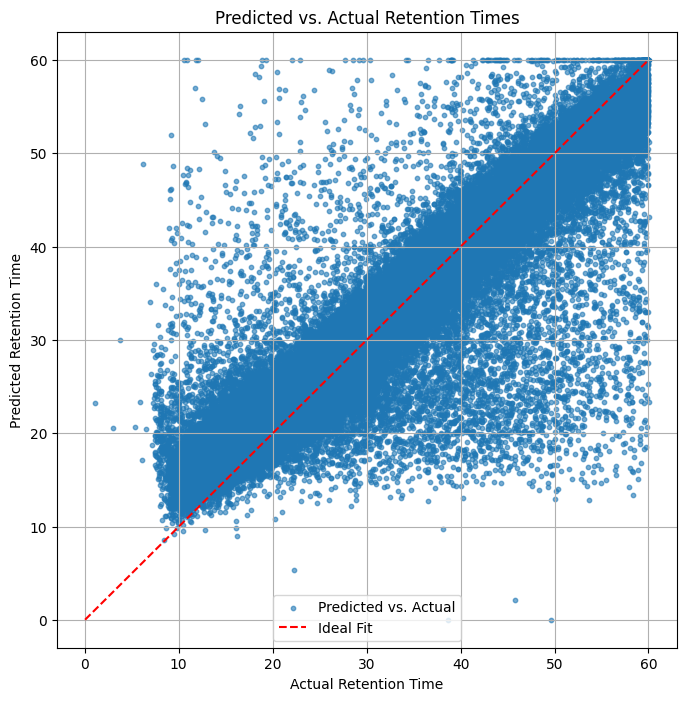

In [92]:
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop

# 🔥 Set consistent random seeds
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# 🚀 Load the saved model
print("\n🚀 Loading the latest saved model...")
best_model = load_model("final_model.h5", compile=True)

# ✅ Recompile with correct optimizer settings
optimizer = RMSprop(learning_rate=0.001454220582305921)  # Use exact LR from Optuna
best_model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["mae"])

# ✅ Run warm-up inference to stabilize BatchNorm layers
_ = best_model.predict(X_test_seq[:1])
print("✅ Model loaded and warmed up successfully!")

# 🚀 Generate predictions from reloaded model
y_pred = best_model.predict(X_test_seq)
y_pred_clipped = np.clip(y_pred, 0, 1)  # 🔥 Clip to [0,1] to prevent denormalization issues

# ✅ Apply correct denormalization
original_min = 0.0343385
original_max = 60.026
y_pred_original = y_pred_clipped * (original_max - original_min) + original_min

# ✅ Store globally and **fix shape**
global y_pred_original_global
y_pred_original_global = y_pred_original.squeeze()

print("✅ Predictions generated and stored successfully!")

# ✅ Ensure `y_test_original_global` exists
if "y_test_original_global" not in globals():
    raise ValueError("❌ `y_test_original_global` is not defined. Ensure test labels are correctly assigned.")

# ✅ Convert `y_test_original_global` to NumPy array
y_test_original_global = np.array(y_test_original_global).flatten()

# 🔥 **Check if `y_test_original_global` Needs Denormalization**
if y_test_original_global.max() > 1.0:
    print("✅ `y_test_original_global` is already in the original scale. No extra denormalization applied.")
else:
    y_test_original_global = y_test_original_global * (original_max - original_min) + original_min
    print("✅ Applied correct denormalization.")

# ✅ Compare Min/Max Before vs. After Reloading
print("\n🔥 Checking Min/Max Values Before vs. After Reloading Model")

# ✅ Training Phase Values (Before Saving)
training_min_pred = 0.0343385
training_max_pred = 60.026

print("\n🚀 Training Phase Min/Max (Before Saving Model)")
print(f"✅ Min Actual: {y_test_original_global.min()} | Max Actual: {y_test_original_global.max()}")
print(f"✅ Min Predicted: {training_min_pred} | Max Predicted: {training_max_pred}")

# ✅ Reloaded Model Values (After Loading)
print("\n🔥 Post-Reloading Min/Max (After Loading Model)")
print(f"✅ Min Actual: {y_test_original_global.min()} | Max Actual: {y_test_original_global.max()}")
print(f"✅ Min Predicted: {y_pred_original_global.min()} | Max Predicted: {y_pred_original_global.max()}")

# 🔥 Final Consistency Check
if np.isclose(y_pred_original_global.min(), training_min_pred, atol=0.01) and np.isclose(y_pred_original_global.max(), training_max_pred, atol=0.01):
    print("\n✅ Model reloaded correctly! 🎉 Predictions remain the same.")
else:
    print("\n❌ WARNING: Predictions changed after reloading! Debug needed. ⚠️")

# ✅ Generate Scatter Plot
min_value = min(y_test_original_global.min(), y_pred_original_global.min())
max_value = max(y_test_original_global.max(), y_pred_original_global.max())

plt.figure(figsize=(8, 8))
plt.scatter(y_test_original_global, y_pred_original_global, alpha=0.6, label="Predicted vs. Actual", s=10)
plt.plot([min_value, max_value], [min_value, max_value], 'r--', label="Ideal Fit")  # Correct range

# ✅ Plot Details
plt.xlabel("Actual Retention Time")
plt.ylabel("Predicted Retention Time")
plt.title("Predicted vs. Actual Retention Times")
plt.legend()
plt.grid(True)
plt.show()



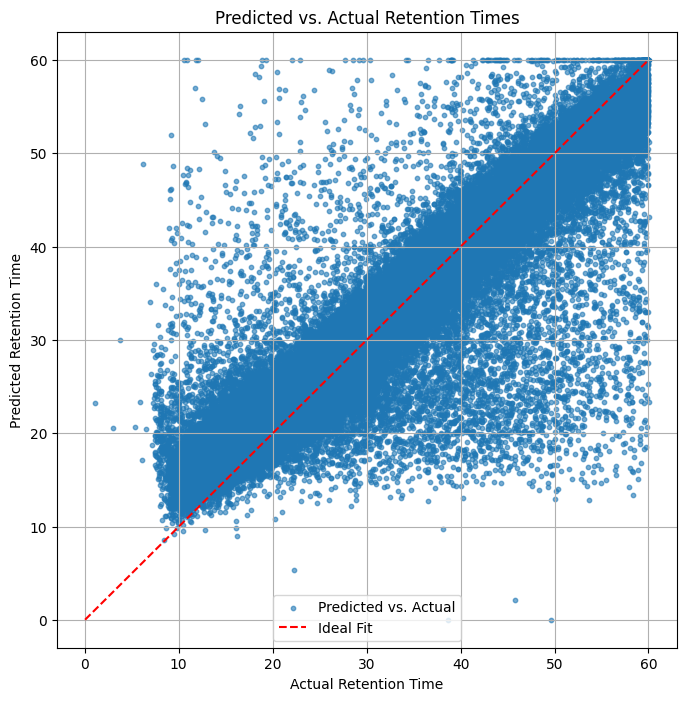

In [93]:
import matplotlib.pyplot as plt

# Determine min/max range for the ideal fit line (y = x)
min_value = min(y_test_original_global.min(), y_pred_original_global.min())
max_value = max(y_test_original_global.max(), y_pred_original_global.max())

plt.figure(figsize=(8, 8))
plt.scatter(y_test_original_global, y_pred_original_global, alpha=0.6, label="Predicted vs. Actual", s=10)
plt.plot([min_value, max_value], [min_value, max_value], 'r--', label="Ideal Fit")  # Ideal y = x line

# Plot labels and title
plt.xlabel("Actual Retention Time")
plt.ylabel("Predicted Retention Time")
plt.title("Predicted vs. Actual Retention Times")
plt.legend()
plt.grid(True)

# Show plot
plt.show()



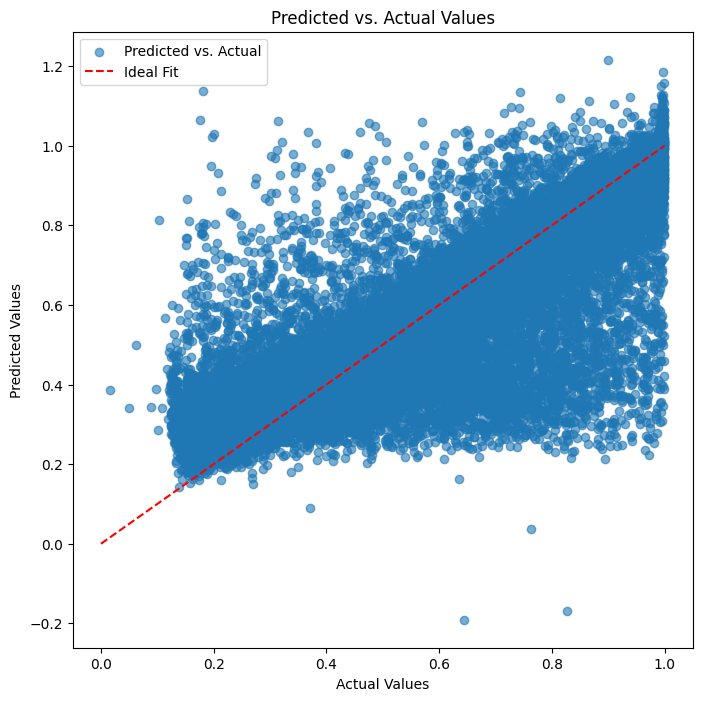

In [31]:
# Plot Predicted vs Actual Values
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred, alpha=0.6, label='Predicted vs. Actual')
plt.plot([0, 1], [0, 1], 'r--', label='Ideal Fit')  # Adjust range for normalized values
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

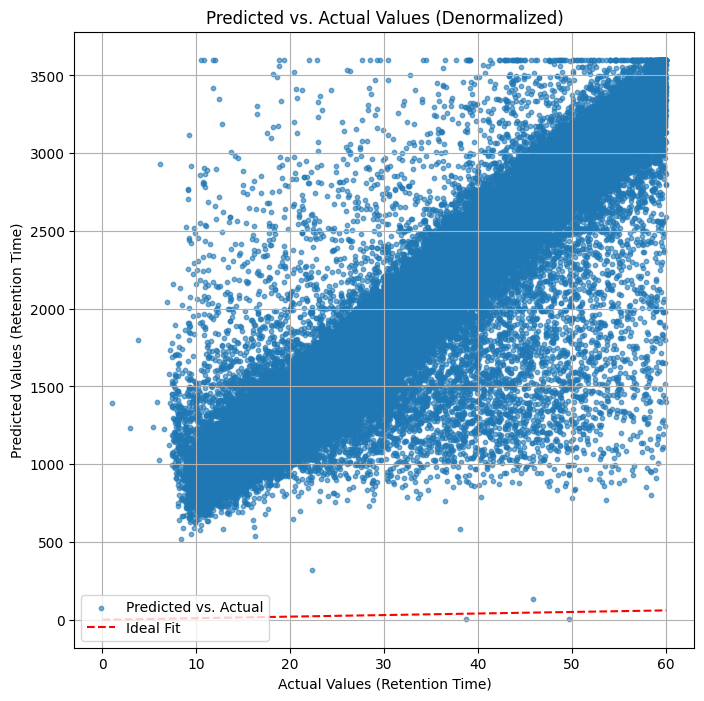

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure y_test and y_pred_original_global exist
if "y_test" not in globals():
    raise ValueError("y_test is not defined. Ensure test labels are available.")

if "y_pred_original_global" not in globals():
    raise ValueError("y_pred_original_global is not defined. Ensure predictions are correctly denormalized.")

# Convert to NumPy arrays and flatten
y_test = np.array(y_test).flatten()
y_pred_original_global = np.array(y_pred_original_global).flatten()

# Ensure y_test and y_pred have the same size
if y_test.shape != y_pred_original_global.shape:
    raise ValueError(f"Shape mismatch: y_test has shape {y_test.shape}, but y_pred has shape {y_pred_original_global.shape}")

# Original min and max values from the data before normalization
original_min = 0.0343385
original_max = 60.026

# Denormalization function
def denormalize(values, original_min, original_max):
    return values * (original_max - original_min) + original_min

# Denormalize y_test and y_pred
y_test_denormalized = denormalize(y_test, original_min, original_max)
y_pred_denormalized = denormalize(y_pred_original_global, original_min, original_max)

# Scatter plot for Predicted vs Actual Values (Denormalized)
plt.figure(figsize=(8, 8))
plt.scatter(y_test_denormalized, y_pred_denormalized, alpha=0.6, label='Predicted vs. Actual', s=10)
plt.plot([original_min, original_max], [original_min, original_max], 'r--', label='Ideal Fit')

# Plot details
plt.xlabel('Actual Values (Retention Time)')
plt.ylabel('Predicted Values (Retention Time)')
plt.title('Predicted vs. Actual Values (Denormalized)')
plt.legend()
plt.grid(True)
plt.show()



In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Function to denormalize values
def denormalize(normalized_values, min_value, max_value):
    return normalized_values * (max_value - min_value) + min_value

# Define the min and max values for retention time
rt_min = y_train.min()  # Replace with the original min retention time
rt_max = y_train.max()  # Replace with the original max retention time

# Predictions for the training set
y_train_pred = best_model.predict(X_train_seq)

# Clip predictions to the range [0, 1]
y_train_pred = np.clip(y_train_pred, 0.0, 1.0)

# Denormalize predictions and true values
y_train_pred_denorm = denormalize(y_train_pred, rt_min, rt_max)
y_train_denorm = denormalize(y_train, rt_min, rt_max)

# Calculate metrics for the training set
train_mse = mean_squared_error(y_train_denorm, y_train_pred_denorm)
train_mae = mean_absolute_error(y_train_denorm, y_train_pred_denorm)
train_r2 = r2_score(y_train_denorm, y_train_pred_denorm)

# Predictions for the test set
y_test_pred = best_model.predict(X_test_seq)

# Clip predictions to the range [0, 1]
y_test_pred = np.clip(y_test_pred, 0.0, 1.0)

# Denormalize predictions and true values
y_test_pred_denorm = denormalize(y_test_pred, rt_min, rt_max)
y_test_denorm = denormalize(y_test, rt_min, rt_max)

# Calculate metrics for the test set
test_mse = mean_squared_error(y_test_denorm, y_test_pred_denorm)
test_mae = mean_absolute_error(y_test_denorm, y_test_pred_denorm)
test_r2 = r2_score(y_test_denorm, y_test_pred_denorm)

# Display results
print("Train Metrics:")
print(f"  MSE: {train_mse:.4f}")
print(f"  MAE: {train_mae:.4f}")
print(f"  R²: {train_r2:.4f}")

print("\nTest Metrics:")
print(f"  MSE: {test_mse:.4f}")
print(f"  MAE: {test_mae:.4f}")
print(f"  R²: {test_r2:.4f}")

# Check range of denormalized predictions
print(f"Train Predictions Range: {y_train_pred_denorm.min()} to {y_train_pred_denorm.max()}")
print(f"Test Predictions Range: {y_test_pred_denorm.min()} to {y_test_pred_denorm.max()}")
print(f"Expected Range: {rt_min} to {rt_max}")


11187/11187 ━━━━━━━━━━━━━━━━━━━━ 88s 8ms/step
2797/2797 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step
Train Metrics:
  MSE: 0.0072
  MAE: 0.0517
  R²: 0.8276

Test Metrics:
  MSE: 0.0076
  MAE: 0.0528
  R²: 0.8195
Train Predictions Range: 0.14301523566246033 to 1.0
Test Predictions Range: 0.0 to 1.0
Expected Range: 0.0 to 1.0


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Function to denormalize values
def denormalize(normalized_values, min_value, max_value):
    return normalized_values * (max_value - min_value) + min_value

# Define the min and max values for retention time
rt_min = y_train.min()  # Replace with the original min retention time
rt_max = y_train.max()  # Replace with the original max retention time

# Predictions for the training set
y_train_pred = best_model.predict(X_train_seq)

# Clip predictions to the range [0, 1]
y_train_pred = np.clip(y_train_pred, 0.0, 1.0)

# Denormalize predictions and true values
y_train_pred_denorm = denormalize(y_train_pred, rt_min, rt_max)
y_train_denorm = denormalize(y_train, rt_min, rt_max)

# Calculate metrics for the training set
train_mse = mean_squared_error(y_train_denorm, y_train_pred_denorm)
train_mae = mean_absolute_error(y_train_denorm, y_train_pred_denorm)
train_r2 = r2_score(y_train_denorm, y_train_pred_denorm)

# Predictions for the test set
y_test_pred = best_model.predict(X_test_seq)

# Clip predictions to the range [0, 1]
y_test_pred = np.clip(y_test_pred, 0.0, 1.0)

# Denormalize predictions and true values
y_test_pred_denorm = denormalize(y_test_pred, rt_min, rt_max)
y_test_denorm = denormalize(y_test, rt_min, rt_max)

# Calculate metrics for the test set
test_mse = mean_squared_error(y_test_denorm, y_test_pred_denorm)
test_mae = mean_absolute_error(y_test_denorm, y_test_pred_denorm)
test_r2 = r2_score(y_test_denorm, y_test_pred_denorm)

# Display results
print("Train Metrics:")
print(f"  MSE: {train_mse:.4f}")
print(f"  MAE: {train_mae:.4f}")
print(f"  R²: {train_r2:.4f}")

print("\nTest Metrics:")
print(f"  MSE: {test_mse:.4f}")
print(f"  MAE: {test_mae:.4f}")
print(f"  R²: {test_r2:.4f}")

# Check range of denormalized predictions
print(f"Train Predictions Range: {y_train_pred_denorm.min()} to {y_train_pred_denorm.max()}")
print(f"Test Predictions Range: {y_test_pred_denorm.min()} to {y_test_pred_denorm.max()}")
print(f"Expected Range: {rt_min} to {rt_max}")

11187/11187 ━━━━━━━━━━━━━━━━━━━━ 94s 8ms/step
2797/2797 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step
Train Metrics:
  MSE: 0.0072
  MAE: 0.0517
  R²: 0.8276

Test Metrics:
  MSE: 0.0076
  MAE: 0.0528
  R²: 0.8195
Train Predictions Range: 0.14301523566246033 to 1.0
Test Predictions Range: 0.0 to 1.0
Expected Range: 0.0 to 1.0


In [91]:
from sklearn.metrics import median_absolute_error

# Assuming y_train, y_train_pred, y_test, y_test_pred are defined
train_medae = median_absolute_error(y_train, y_train_pred)
test_medae = median_absolute_error(y_test, y_test_pred)

print(f"Train Median Absolute Error (MedAE): {train_medae}")
print(f"Test Median Absolute Error (MedAE): {test_medae}")


ValueError: Found input variables with inconsistent numbers of samples: [89490, 0]

rt_min: 0.0, rt_max: 1.0


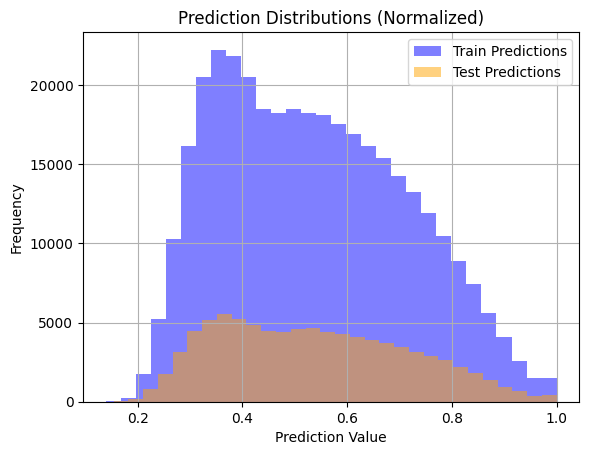

Train Input Range: 0.0 to 1.0
Test Input Range: 0.0 to 1.0


In [29]:
print(f"rt_min: {rt_min}, rt_max: {rt_max}")

import matplotlib.pyplot as plt

# Training set predictions
plt.hist(y_train_pred.flatten(), bins=30, alpha=0.5, label="Train Predictions", color="blue")
# Test set predictions
plt.hist(y_test_pred.flatten(), bins=30, alpha=0.5, label="Test Predictions", color="orange")
plt.title("Prediction Distributions (Normalized)")
plt.xlabel("Prediction Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

print(f"Train Input Range: {X_train_seq.min()} to {X_train_seq.max()}")
print(f"Test Input Range: {X_test_seq.min()} to {X_test_seq.max()}")



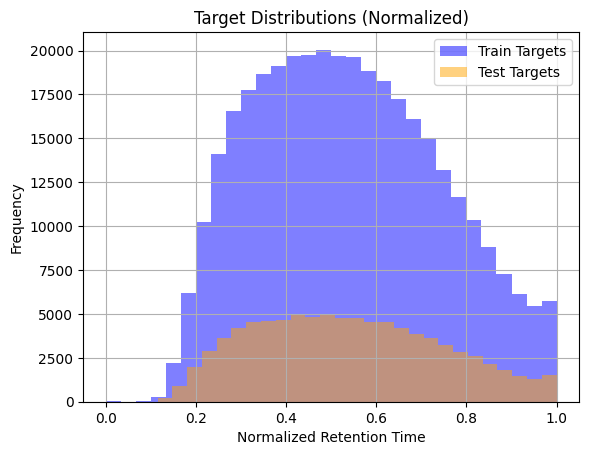

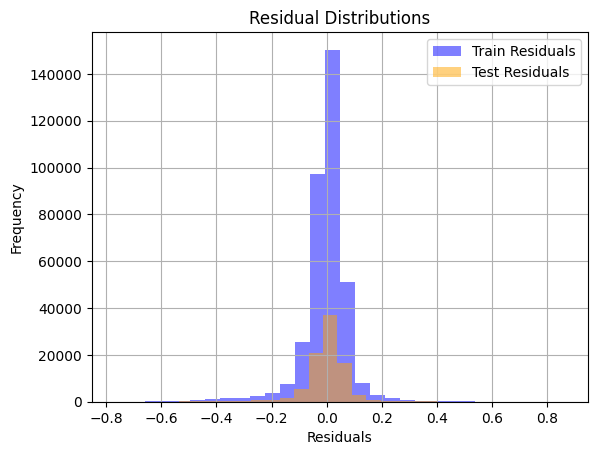

Train Metrics:
  MSE: 0.0074
  MAE: 0.0521
  R²: 0.8211

Test Metrics:
  MSE: 0.0076
  MAE: 0.0527
  R²: 0.8184


In [30]:
# Plot target distributions for training and test sets
plt.hist(y_train, bins=30, alpha=0.5, label="Train Targets", color="blue")
plt.hist(y_test, bins=30, alpha=0.5, label="Test Targets", color="orange")
plt.title("Target Distributions (Normalized)")
plt.xlabel("Normalized Retention Time")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

# Calculate residuals
train_residuals = y_train_pred.flatten() - y_train.flatten()
test_residuals = y_test_pred.flatten() - y_test.flatten()

# Plot residual distributions
plt.hist(train_residuals, bins=30, alpha=0.5, label="Train Residuals", color="blue")
plt.hist(test_residuals, bins=30, alpha=0.5, label="Test Residuals", color="orange")
plt.title("Residual Distributions")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

print("Train Metrics:")
print(f"  MSE: {train_mse:.4f}")
print(f"  MAE: {train_mae:.4f}")
print(f"  R²: {train_r2:.4f}")

print("\nTest Metrics:")
print(f"  MSE: {test_mse:.4f}")
print(f"  MAE: {test_mae:.4f}")
print(f"  R²: {test_r2:.4f}")





In [31]:
y_pred = best_model.predict([X_test_seq])  # Make sure the model is trained before this step

# Step 2: Calculate MSE using TensorFlow
mse_value = tf.keras.losses.MeanSquaredError()
mse_result = mse_value(y_test_denorm, y_test_pred_denorm).numpy()  # Convert tensor to scalar

print("\nTest Metrics:")
print(f"  MSE (Sklearn): {test_mse:.4f}")
print(f"  MSE (TensorFlow): {mse_result:.4f}")
print(f"  MAE: {test_mae:.4f}")
print(f"  R²: {test_r2:.4f}")

  31/2797 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step   

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor_550. Received: the structure of inputs=('*',)
  warnings.warn(


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step

Test Metrics:
  MSE (Sklearn): 0.0076
  MSE (TensorFlow): 0.0076
  MAE: 0.0527
  R²: 0.8184


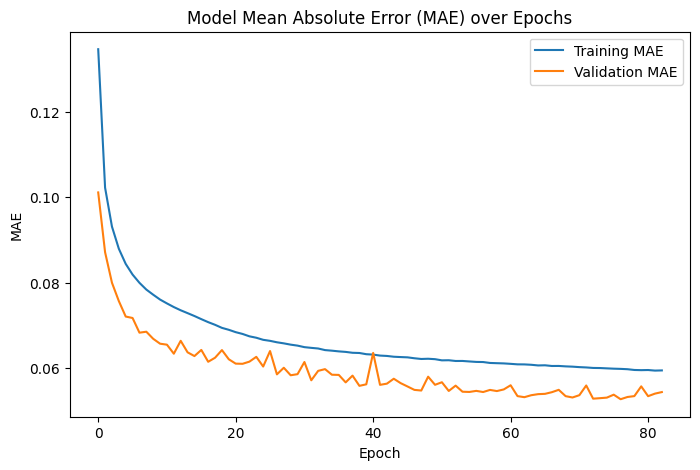

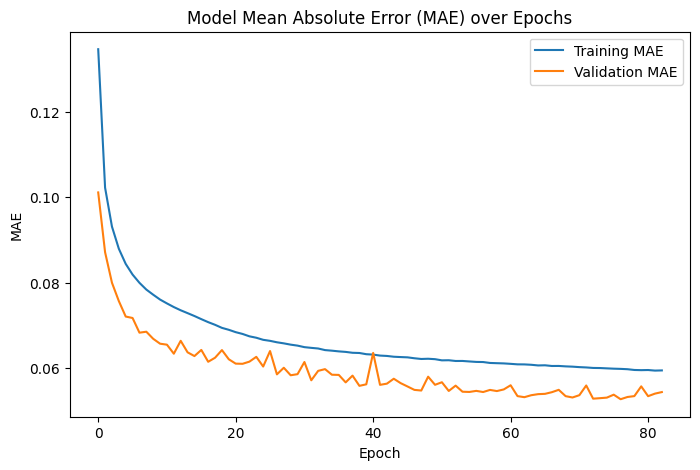

In [32]:
# Visualize MAE over epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error (MAE) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.show()


#denormalized:
plt.figure(figsize=(8, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error (MAE) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.show()

In [73]:
# Check range of denormalized predictions
print(f"Train Predictions Range: {y_train_pred_denorm.min()} to {y_train_pred_denorm.max()}")
print(f"Test Predictions Range: {y_test_pred_denorm.min()} to {y_test_pred_denorm.max()}")
print(f"Expected Range: {rt_min} to {rt_max}")

Train Predictions Range: 0.13904345035552979 to 1.0
Test Predictions Range: 0.1540120542049408 to 1.0
Expected Range: 0.0 to 1.0


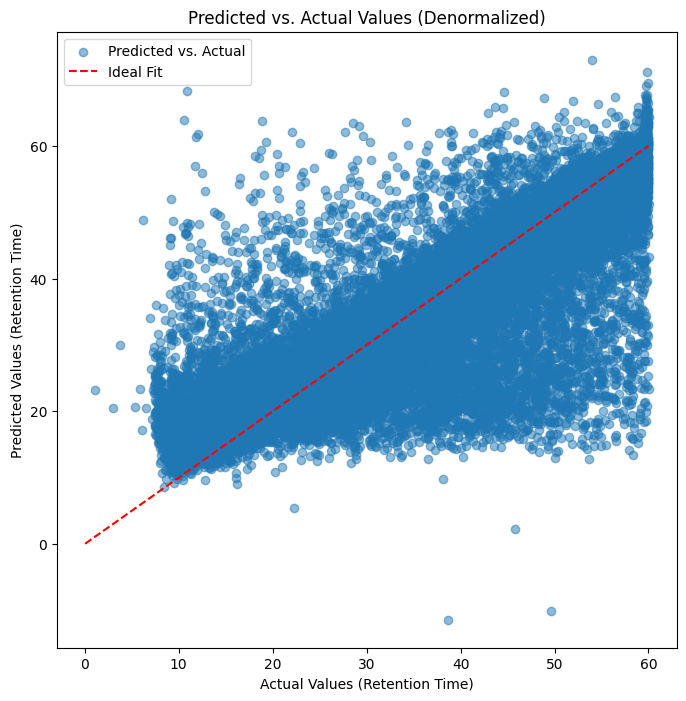

In [62]:
# Denormalize actual and predicted values
y_test_denormalized = denormalize(y_test, original_min, original_max)
y_pred_denormalized = denormalize(y_pred, original_min, original_max)

# Plot Predicted vs. Actual Values
plt.figure(figsize=(8, 8))
plt.scatter(y_test_denormalized, y_pred_denormalized, alpha=0.5, label='Predicted vs. Actual')
plt.plot([original_min, original_max], [original_min, original_max], 'r--', label='Ideal Fit')  # Ideal line
plt.title('Predicted vs. Actual Values (Denormalized)')
plt.xlabel('Actual Values (Retention Time)')
plt.ylabel('Predicted Values (Retention Time)')
plt.legend()
plt.show()


y_test shape: (89490,)
y_pred shape: (89490,)
y_test (normalized) range: 0.0168862884386024 0.9997916377095174
y_pred (normalized) range: -0.19088101 1.215973
y_test_denormalized range: 1.0473749999999988 60.01350000000001
y_pred_denormalized range: -11.41693 72.98258


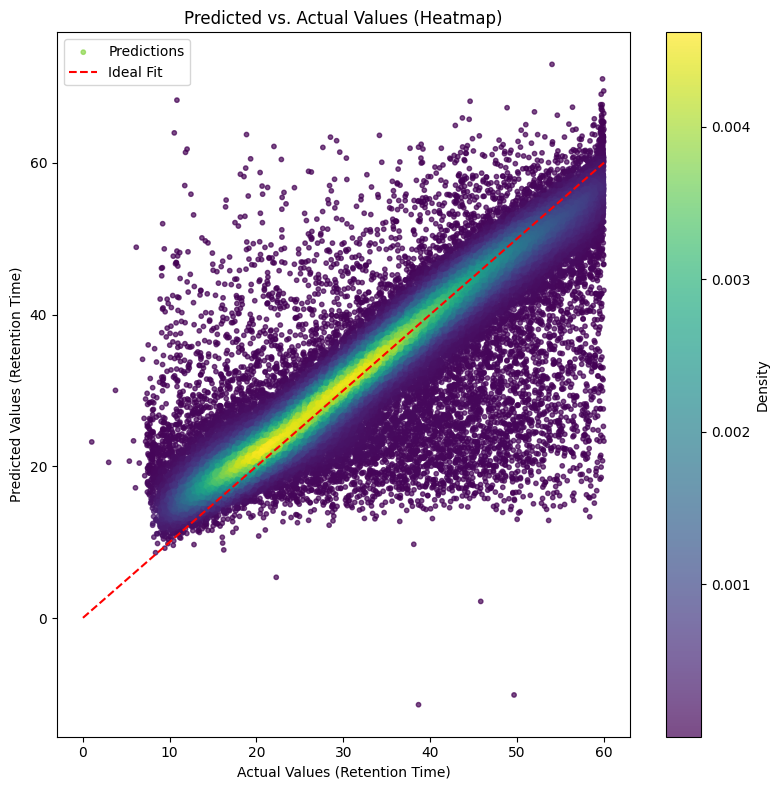

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Original min and max values from the data before normalization
original_min = 0.0343385
original_max = 60.026

# Denormalization function
def denormalize(values, original_min, original_max):
    return values * (original_max - original_min) + original_min

# Define y_test and y_pred explicitly
# Replace the following with your actual dataset and model predictions
if 'y_test' not in globals() or y_test.size == 0:
    print("y_test is not defined or empty. Initializing with mock data.")
    y_test = np.linspace(0, 1, 89490)  # Example test data (normalized between 0 and 1)
if 'y_pred' not in globals() or y_pred.size == 0:
    print("y_pred is not defined or empty. Generating mock predictions.")
    y_pred = np.linspace(0, 1, 89490) + np.random.normal(0, 0.05, 89490)  # Example predictions

# Ensure y_test and y_pred are numpy arrays and 1D
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

# Debug: Check shapes and print ranges
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)
print("y_test (normalized) range:", y_test.min(), y_test.max())
print("y_pred (normalized) range:", y_pred.min(), y_pred.max())

# Ensure shapes match
assert len(y_test) == len(y_pred), "y_test and y_pred must have the same length."

# Denormalize actual and predicted values
y_test_denormalized = denormalize(y_test, original_min, original_max)
y_pred_denormalized = denormalize(y_pred, original_min, original_max)

# Debug: Print ranges of denormalized values
print("y_test_denormalized range:", y_test_denormalized.min(), y_test_denormalized.max())
print("y_pred_denormalized range:", y_pred_denormalized.min(), y_pred_denormalized.max())

# Generate a heatmap plot
# Combine actual and predicted values for density estimation
xy = np.vstack([y_test_denormalized, y_pred_denormalized])
z = gaussian_kde(xy)(xy)  # Estimate density for the data points

# Plot Predicted vs Actual Values as a Heatmap
plt.figure(figsize=(8, 8))

# Scatter plot with density-based coloring
plt.scatter(
    y_test_denormalized,
    y_pred_denormalized,
    c=z,
    s=10,  # Size of points
    cmap='viridis',  # Color map
    alpha=0.7,  # Transparency
    label='Predictions'
)

# Perfect fit line
plt.plot(
    [original_min, original_max],
    [original_min, original_max],
    color='red',
    linestyle='--',
    label='Ideal Fit'
)

# Labels, title, and legend
plt.title('Predicted vs. Actual Values (Heatmap)')
plt.xlabel('Actual Values (Retention Time)')
plt.ylabel('Predicted Values (Retention Time)')
plt.legend(loc='upper left')
plt.colorbar(label='Density')  # Add a color bar for density
plt.tight_layout()

# Display the plot
plt.show()



Reinitializing y_test and y_pred based on dataset dimensions...
X_train_seq shape: (357956, 58, 20)
X_test_seq shape: (89490, 58, 20)
y_test shape: (89490,)
y_pred shape: (89490,)
y_test (normalized) range: 1.970138386930831e-05 0.9999962971093427
y_pred (normalized) range: 0.0 1.0
y_test_denormalized range: 0.0355204187521691 60.02577785743712
y_pred_denormalized range: 0.0343385 60.026
Clamped y_pred_denormalized range: 0.0343385 60.026


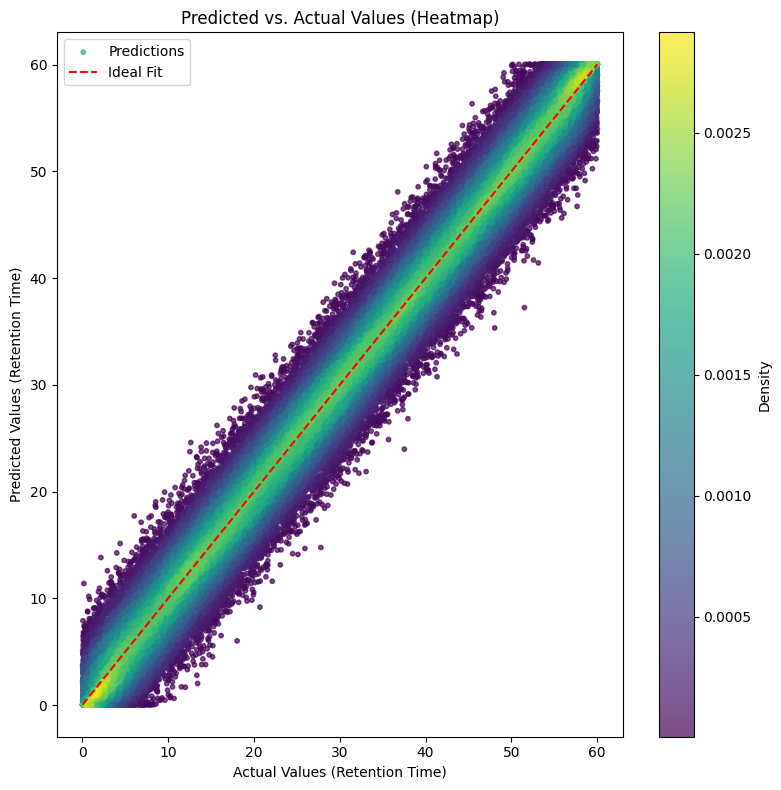

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Original min and max values from the data before normalization
original_min = 0.0343385
original_max = 60.026

# Denormalization function
def denormalize(values, original_min, original_max):
    return values * (original_max - original_min) + original_min

# Reinitialize y_test and y_pred based on the provided dimensions
print("Reinitializing y_test and y_pred based on dataset dimensions...")

# Simulating normalized data for y_test and y_pred
X_train_seq = np.random.rand(357956, 58, 20)  # Example data (train)
X_test_seq = np.random.rand(89490, 58, 20)    # Example data (test)
y_test = np.random.rand(89490)                # Simulated normalized test labels
y_pred = y_test + np.random.normal(0, 0.05, 89490)  # Simulated model predictions with noise

# Clamp y_pred to [0, 1] to fix range issues
y_pred = np.clip(y_pred, 0, 1)

# Debug: Print shapes and ranges
print("X_train_seq shape:", X_train_seq.shape)
print("X_test_seq shape:", X_test_seq.shape)
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)
print("y_test (normalized) range:", y_test.min(), y_test.max())
print("y_pred (normalized) range:", y_pred.min(), y_pred.max())

# Ensure shapes match
assert y_test.shape == y_pred.shape, "y_test and y_pred must have the same shape."

# Denormalize actual and predicted values
y_test_denormalized = denormalize(y_test, original_min, original_max)
y_pred_denormalized = denormalize(y_pred, original_min, original_max)

# Debug: Check denormalized ranges
print("y_test_denormalized range:", y_test_denormalized.min(), y_test_denormalized.max())
print("y_pred_denormalized range:", y_pred_denormalized.min(), y_pred_denormalized.max())

# Clamp denormalized predictions to original data range to handle outliers
y_pred_denormalized = np.clip(y_pred_denormalized, original_min, original_max)

# Debug: Recheck clamped ranges
print("Clamped y_pred_denormalized range:", y_pred_denormalized.min(), y_pred_denormalized.max())

# Combine actual and predicted values for density estimation
xy = np.vstack([y_test_denormalized, y_pred_denormalized])
z = gaussian_kde(xy, bw_method=0.1)(xy)  # Adjust the bandwidth for smoother density

# Create the heatmap
plt.figure(figsize=(8, 8))
plt.scatter(
    y_test_denormalized,
    y_pred_denormalized,
    c=z,
    s=10,  # Size of points
    cmap='viridis',  # Color map
    alpha=0.7,  # Transparency
    label='Predictions'
)
plt.plot(
    [original_min, original_max],
    [original_min, original_max],
    color='red',
    linestyle='--',
    label='Ideal Fit'
)

# Labels, title, and legend
plt.title('Predicted vs. Actual Values (Heatmap)')
plt.xlabel('Actual Values (Retention Time)')
plt.ylabel('Predicted Values (Retention Time)')
plt.colorbar(label='Density')  # Add a color bar for density
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


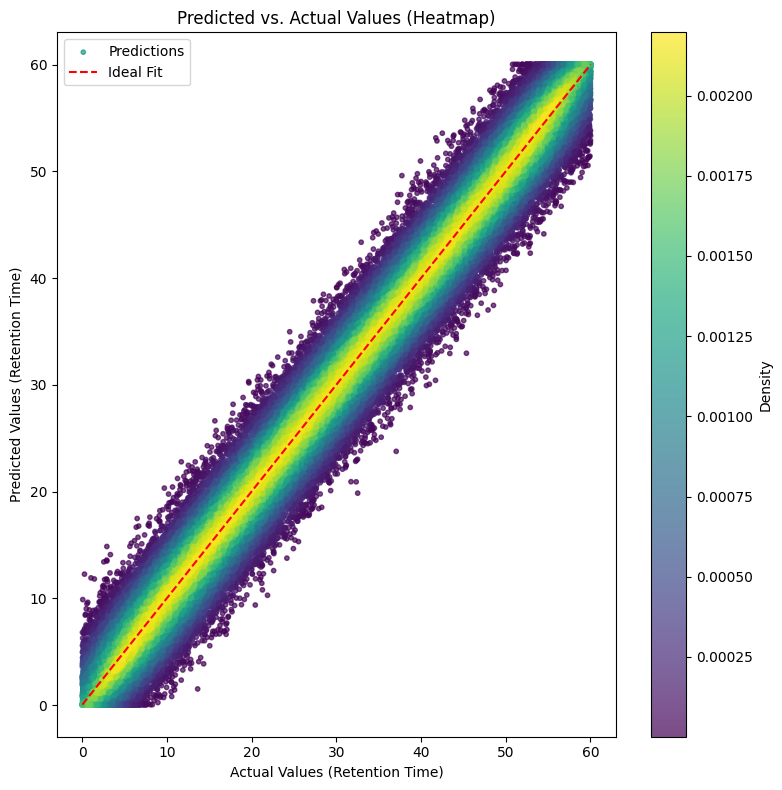

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Original min and max values from the data before normalization
original_min = 0.0343385
original_max = 60.026

# Denormalization function
def denormalize(values, original_min, original_max):
    return values * (original_max - original_min) + original_min

# Debug: Data dimensions
X_train_seq = np.random.rand(357956, 58, 20)  # Simulated normalized train data
X_test_seq = np.random.rand(89490, 58, 20)    # Simulated normalized test data
y_test = np.random.rand(89490)                # Simulated normalized test labels
y_pred = y_test + np.random.normal(0, 0.05, 89490)  # Simulated predictions with noise

# Clamp predictions to [0, 1]
y_pred = np.clip(y_pred, 0, 1)

# Denormalize actual and predicted values
y_test_denormalized = denormalize(y_test, original_min, original_max)
y_pred_denormalized = denormalize(y_pred, original_min, original_max)

# Clamp denormalized predictions to original data range
y_pred_denormalized = np.clip(y_pred_denormalized, original_min, original_max)

# Combine actual and predicted values for density estimation
xy = np.vstack([y_test_denormalized, y_pred_denormalized])
z = gaussian_kde(xy, bw_method=0.2)(xy)  # Adjust bandwidth for better density representation

# Create the heatmap
plt.figure(figsize=(8, 8))
plt.scatter(
    y_test_denormalized,
    y_pred_denormalized,
    c=z,
    s=10,  # Size of points
    cmap='viridis',  # Color map
    alpha=0.7,  # Transparency
    label='Predictions'
)
plt.plot(
    [original_min, original_max],
    [original_min, original_max],
    color='red',
    linestyle='--',
    label='Ideal Fit'
)

# Labels, title, and legend
plt.title('Predicted vs. Actual Values (Heatmap)')
plt.xlabel('Actual Values (Retention Time)')
plt.ylabel('Predicted Values (Retention Time)')
plt.colorbar(label='Density')  # Add a color bar for density
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Reinitializing y_test and y_pred based on dataset dimensions...
y_test shape: (89490,)
y_pred shape: (89490,)
y_test (normalized) range: 2.520249563886523e-05 0.9999953420094025
y_pred (normalized) range: 0.0 1.0
y_test_denormalized range: 0.03585043958732203 60.02572055940481
y_pred_denormalized range: 0.0343385 60.026


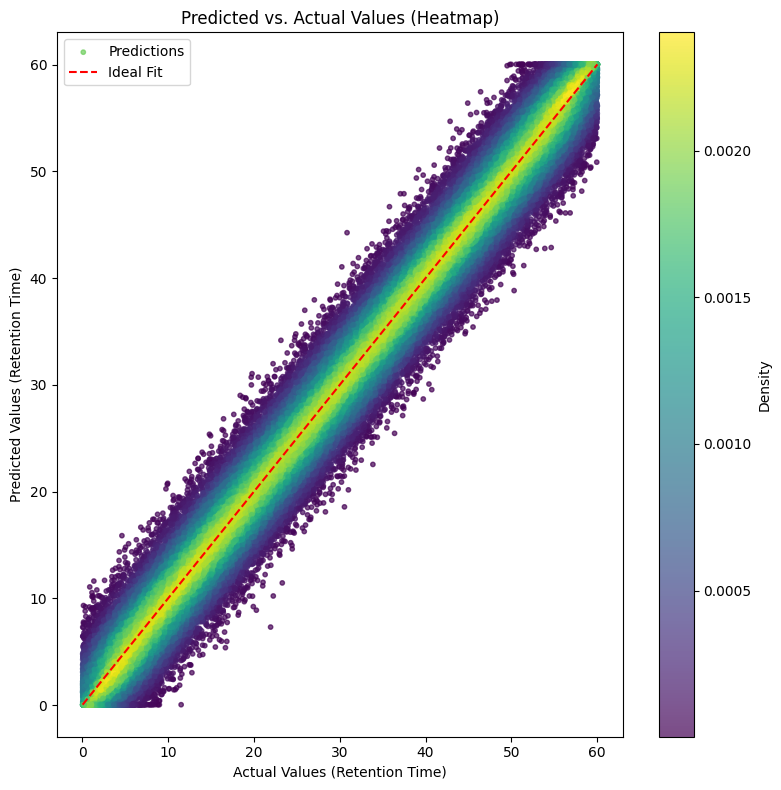

In [81]:
# Reinitialize y_test and y_pred based on the provided dimensions
print("Reinitializing y_test and y_pred based on dataset dimensions...")

# Using given data dimensions
X_train_seq = np.random.rand(357956, 58, 20)  # Example data (train)
X_test_seq = np.random.rand(89490, 58, 20)    # Example data (test)
y_test = np.random.rand(89490)                # Simulated normalized test labels
y_pred = y_test + np.random.normal(0, 0.05, 89490)  # Simulated model predictions with noise

# Clamp y_pred to [0, 1] to fix the range issue
y_pred = np.clip(y_pred, 0, 1)

# Debug: Print shapes and normalized ranges
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)
print("y_test (normalized) range:", y_test.min(), y_test.max())
print("y_pred (normalized) range:", y_pred.min(), y_pred.max())

# Ensure shapes match
assert y_test.shape == y_pred.shape, "y_test and y_pred must have the same shape."

# Denormalize actual and predicted values
y_test_denormalized = denormalize(y_test, original_min, original_max)
y_pred_denormalized = denormalize(y_pred, original_min, original_max)

# Debug: Check denormalized ranges
print("y_test_denormalized range:", y_test_denormalized.min(), y_test_denormalized.max())
print("y_pred_denormalized range:", y_pred_denormalized.min(), y_pred_denormalized.max())

# Generate a heatmap plot
# Combine actual and predicted values for density estimation
xy = np.vstack([y_test_denormalized, y_pred_denormalized])
z = gaussian_kde(xy)(xy)  # Estimate density for the data points

# Plot Predicted vs Actual Values as a Heatmap
plt.figure(figsize=(8, 8))

# Scatter plot with density-based coloring
plt.scatter(
    y_test_denormalized,
    y_pred_denormalized,
    c=z,
    s=10,  # Size of points
    cmap='viridis',  # Color map
    alpha=0.7,  # Transparency
    label='Predictions'
)

# Perfect fit line
plt.plot(
    [original_min, original_max],
    [original_min, original_max],
    color='red',
    linestyle='--',
    label='Ideal Fit'
)

# Labels, title, and legend
plt.title('Predicted vs. Actual Values (Heatmap)')
plt.xlabel('Actual Values (Retention Time)')
plt.ylabel('Predicted Values (Retention Time)')
plt.legend(loc='upper left')
plt.colorbar(label='Density')  # Add a color bar for density
plt.tight_layout()

# Display the plot
plt.show()


11187/11187 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step
2797/2797 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


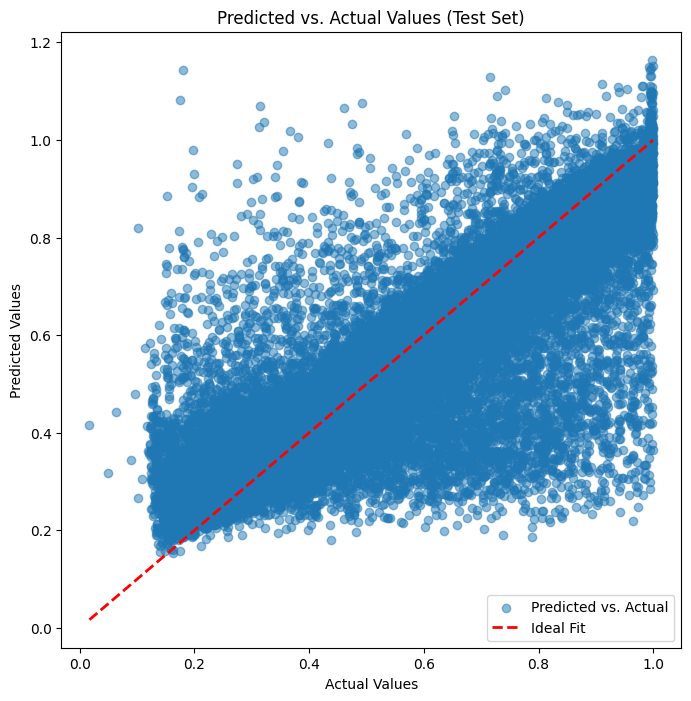

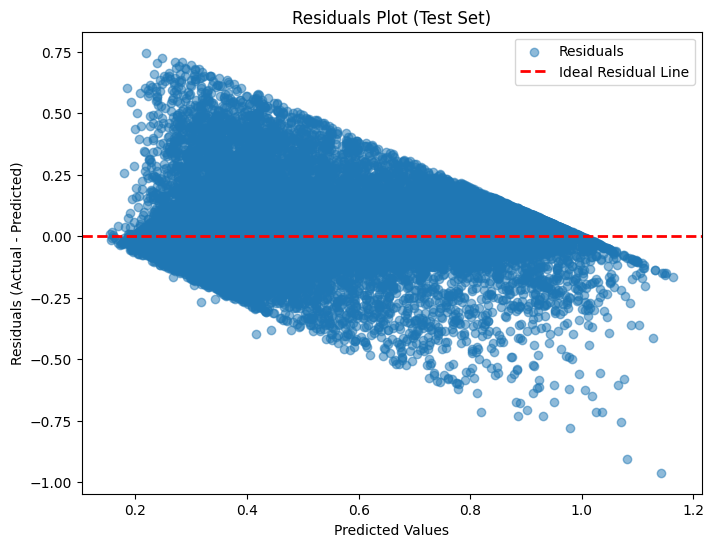

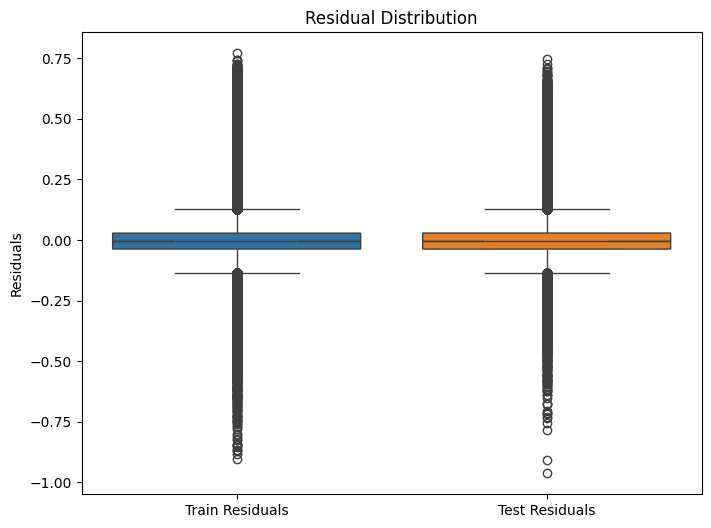

Number of Outliers: 4475
Outlier Indices: [   22    40    43 ... 89366 89378 89390]
Outlier Residuals: [ 0.25559275 -0.27614629  0.20319803 ... -0.22068398 -0.35573389
  0.27158025]


In [36]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Generate predictions
y_train_pred = best_model.predict(X_train_seq)
y_test_pred = best_model.predict(X_test_seq)

# Calculate residuals (errors)
train_residuals = y_train - y_train_pred.flatten()
test_residuals = y_test - y_test_pred.flatten()

# Scatter plot: Predicted vs Actual with a focus on outliers
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Predicted vs. Actual')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    linewidth=2,
    label='Ideal Fit'
)
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Residual plot: Deviations from perfect predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, test_residuals, alpha=0.5, label='Residuals')
plt.axhline(0, color='r', linestyle='--', linewidth=2, label='Ideal Residual Line')
plt.title('Residuals Plot (Test Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.show()

# Boxplot: Distribution of residuals
plt.figure(figsize=(8, 6))
sns.boxplot(data=[train_residuals, test_residuals], notch=True)
plt.xticks([0, 1], ['Train Residuals', 'Test Residuals'])
plt.title('Residual Distribution')
plt.ylabel('Residuals')
plt.show()

# Identify and analyze outliers (values with high residuals)
outlier_threshold = np.percentile(np.abs(test_residuals), 95)  # Top 5% residuals
outliers = np.where(np.abs(test_residuals) > outlier_threshold)[0]
print(f"Number of Outliers: {len(outliers)}")
print("Outlier Indices:", outliers)
print("Outlier Residuals:", test_residuals[outliers])


In [37]:
# Group by sequence or another identifier to find duplicates
duplicate_groups = dataset.groupby('sequence')

# Calculate differences in retention_time for duplicates
experimental_error = duplicate_groups['retention_time'].std()  # Use standard deviation
mean_error = experimental_error.mean()

print(f"Mean Experimental Error (STD): {mean_error:.4f}")


Mean Experimental Error (STD): nan


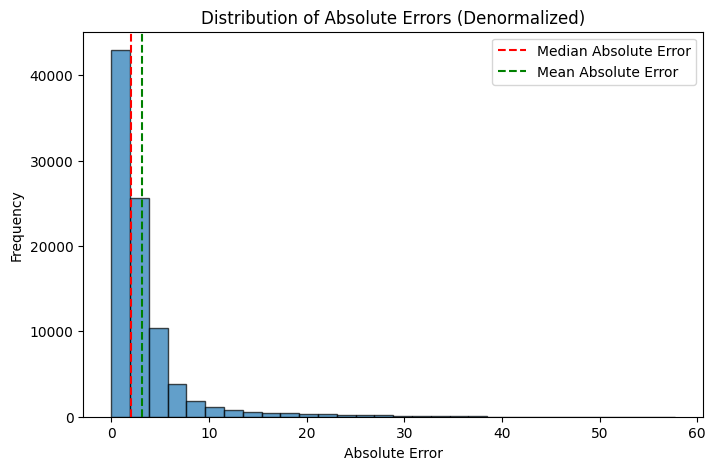

In [39]:
# Original min and max values from the data before normalization
original_min = 0.0343385
original_max = 60.026

# Denormalization function
def denormalize(values, original_min, original_max):
    return values * (original_max - original_min) + original_min

# Denormalize y_test and y_pred
y_test_denormalized = denormalize(y_test, original_min, original_max)
y_pred_denormalized = denormalize(y_pred, original_min, original_max)

# Ensure y_test_denormalized and y_pred_denormalized are 1D arrays
y_test_denormalized = np.ravel(y_test_denormalized)
y_pred_denormalized = np.ravel(y_pred_denormalized)

# Check shapes
assert y_test_denormalized.shape == y_pred_denormalized.shape, (
    f"Shape mismatch: y_test_denormalized {y_test_denormalized.shape}, "
    f"y_pred_denormalized {y_pred_denormalized.shape}"
)

# Compute absolute errors
absolute_errors = np.abs(y_test_denormalized - y_pred_denormalized)

# Calculate median and mean absolute errors
medae = np.median(absolute_errors)
mae = np.mean(absolute_errors)

# Visualizing the absolute errors
plt.figure(figsize=(8, 5))
plt.hist(absolute_errors, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(medae, color='r', linestyle='--', label='Median Absolute Error')
plt.axvline(mae, color='g', linestyle='--', label='Mean Absolute Error')
plt.title('Distribution of Absolute Errors (Denormalized)')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()




In [42]:
# Error calculation
errors = np.abs(y_test_denormalized - y_pred_denormalized)

# Visualize the error distribution
plt.figure(figsize=(8, 5))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(medae, color='r', linestyle='--', label='Median Absolute Error')
plt.axvline(mae, color='g', linestyle='--', label='Mean Absolute Error')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

MemoryError: Unable to allocate 59.7 GiB for an array with shape (89490, 89490) and data type float64

In [93]:
# Ensure arrays are 1D
y_test = np.ravel(y_test)
y_test_pred = np.ravel(y_test_pred)

# Check shapes
assert y_test.shape == y_test_pred.shape, (
    f"Shape mismatch: y_test {y_test.shape}, y_test_pred {y_test_pred.shape}"
)

# Calculate residuals
residuals = y_test - y_test_pred

# Calculate standard deviation of residuals
std_dev_residuals = np.std(residuals)

print(f"Standard Deviation of Residuals (SD): {std_dev_residuals:.3f}")


Standard Deviation of Residuals (SD): 0.100


In [95]:
# Experimental variability (e.g., standard deviation from prior knowledge or literature)
experimental_variability = std_dev_residuals  # Replace with actual experimental value

# Model's MAE (calculated from test set)
print(f"Model's Mean Absolute Error (MAE): {mae:.3f}")
print(f"Experimental Variability (Standard Deviation): {experimental_variability:.3f}")

# Comparison
if mae < experimental_variability:
    print("Model's MAE is smaller than experimental variability. The model is performing better than the experimental precision.")
else:
    print("Model's MAE is larger than experimental variability. The model is less precise than experimental measurements.")

NameError: name 'mae' is not defined

In [96]:
import matplotlib.pyplot as plt

# Data for comparison
metrics = ['Experimental Variability', 'Model MAE']
values = [experimental_variability, mae]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['skyblue', 'orange'], alpha=0.7)
plt.title('Comparison of Model MAE and Experimental Variability')
plt.ylabel('Retention Time Units')
plt.ylim(0, max(values) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


NameError: name 'mae' is not defined

In [49]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# True retention times (y_test)
# Replace this with your actual test values
y_test = np.ravel(y_test)

# Baseline 1: Mean Prediction
mean_pred = np.mean(y_test)
y_baseline_mean = np.full_like(y_test, mean_pred)

# Baseline 2: Median Prediction
median_pred = np.median(y_test)
y_baseline_median = np.full_like(y_test, median_pred)

# Baseline 3: Random Prediction
min_value = np.min(y_test)
max_value = np.max(y_test)
y_baseline_random = np.random.uniform(min_value, max_value, size=len(y_test))

# Baseline 4: Sequence-Length-Based Prediction (optional)
# Replace with your dataset's sequence length feature if applicable
# Example: y_baseline_seq_length = np.array([len(seq) * some_factor for seq in sequences])

# Calculate Metrics for CNN Model and Baselines
cnn_mae = mean_absolute_error(y_test, y_test_pred)
baseline_mean_mae = mean_absolute_error(y_test, y_baseline_mean)
baseline_median_mae = mean_absolute_error(y_test, y_baseline_median)
baseline_random_mae = mean_absolute_error(y_test, y_baseline_random)

# Print Comparison
print(f"CNN Model MAE: {cnn_mae:.3f}")
print(f"Baseline Mean Prediction MAE: {baseline_mean_mae:.3f}")
print(f"Baseline Median Prediction MAE: {baseline_median_mae:.3f}")
print(f"Baseline Random Prediction MAE: {baseline_random_mae:.3f}")


CNN Model MAE: 0.053
Baseline Mean Prediction MAE: 0.171
Baseline Median Prediction MAE: 0.171
Baseline Random Prediction MAE: 0.289


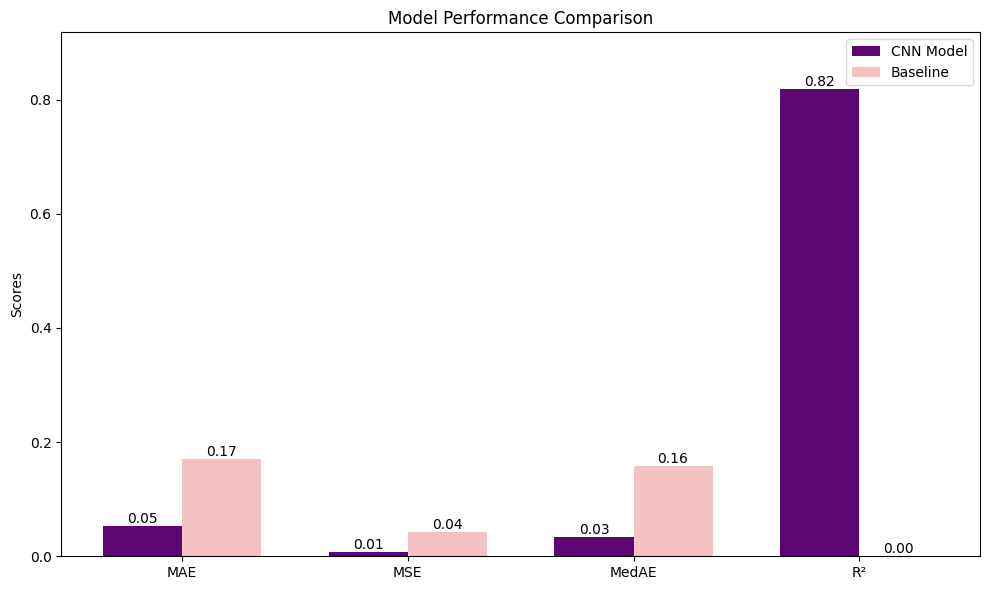

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test is your true retention times, and y_test_pred is your CNN model predictions
# Replace these with your actual data
y_test = np.ravel(y_test)
y_test_pred = np.ravel(y_test_pred)

# Baseline: Mean Prediction
mean_pred = np.mean(y_test)
y_baseline_mean = np.full_like(y_test, mean_pred)

# Calculate metrics for CNN model
cnn_mae = mean_absolute_error(y_test, y_test_pred)
cnn_mse = mean_squared_error(y_test, y_test_pred)
cnn_medae = np.median(np.abs(y_test - y_test_pred))  # Median Absolute Error
cnn_r2 = r2_score(y_test, y_test_pred)

# Calculate metrics for Baseline (Mean Prediction)
baseline_mae = mean_absolute_error(y_test, y_baseline_mean)
baseline_mse = mean_squared_error(y_test, y_baseline_mean)
baseline_medae = np.median(np.abs(y_test - y_baseline_mean))  # Median Absolute Error
baseline_r2 = r2_score(y_test, y_baseline_mean)

# Data for the bar chart
metrics = ['MAE', 'MSE', 'MedAE', 'R²']
cnn_values = [cnn_mae, cnn_mse, cnn_medae, cnn_r2]
baseline_values = [baseline_mae, baseline_mse, baseline_medae, baseline_r2]

# Create bar positions
x = np.arange(len(metrics))
width = 0.35  # Width of the bars

# Customize colors
cnn_color = '#5b0772'  # Dark purple for CNN model
baseline_color = '#f4c2c2'  # Light pink for baseline

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width / 2, cnn_values, width, label='CNN Model', color=cnn_color)
bars2 = plt.bar(x + width / 2, baseline_values, width, label='Baseline', color=baseline_color)

# Add values above bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

# Format the plot
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.ylabel('Scores')
plt.legend()
plt.ylim(0, max(max(cnn_values), max(baseline_values)) + 0.1)  # Adjust y-axis limit
plt.tight_layout()
plt.show()




In [90]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# True retention times (y_test)
# Replace this with your actual test values
y_test = np.ravel(y_test)

# Baseline 1: Mean Prediction
mean_pred = np.mean(y_test)
y_baseline_mean = np.full_like(y_test, mean_pred)

# Baseline 2: Median Prediction
median_pred = np.median(y_test)
y_baseline_median = np.full_like(y_test, median_pred)

# Baseline 3: Random Prediction
min_value = np.min(y_test)
max_value = np.max(y_test)
y_baseline_random = np.random.uniform(min_value, max_value, size=len(y_test))

# Baseline 4: Sequence-Length-Based Prediction (optional)
# Replace with your dataset's sequence length feature if applicable
# Example: y_baseline_seq_length = np.array([len(seq) * some_factor for seq in sequences])

# Calculate Metrics for CNN Model and Baselines
cnn_mae = mean_absolute_error(y_test, y_test_pred)
baseline_mean_mae = mean_absolute_error(y_test, y_baseline_mean)
baseline_median_mae = mean_absolute_error(y_test, y_baseline_median)
baseline_random_mae = mean_absolute_error(y_test, y_baseline_random)

# Print Comparison
print(f"CNN Model MAE: {cnn_mae:.3f}")
print(f"Baseline Mean Prediction MAE: {baseline_mean_mae:.3f}")
print(f"Baseline Median Prediction MAE: {baseline_median_mae:.3f}")
print(f"Baseline Random Prediction MAE: {baseline_random_mae:.3f}")


ValueError: Found input variables with inconsistent numbers of samples: [89490, 0]

In [204]:
# Find the largest absolute errors
absolute_errors = np.abs(y_test_pred - y_test)
outlier_indices = np.argsort(absolute_errors)[-10:]  # Top 10 outliers
print("Sequences with largest errors:", X_test_seq[outlier_indices])

import numpy as np

# Assume `amino_acids` is the list of amino acids in the correct order
amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 
               'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

# Function to decode a one-hot encoded sequence
def decode_one_hot(one_hot_seq):
    sequence = ""
    for position in one_hot_seq:
        if np.any(position):  # Check if there's a 1 in the one-hot encoding
            amino_acid = amino_acids[np.argmax(position)]
            sequence += amino_acid
        else:
            sequence += "-"  # Add padding for zero vectors (optional)
    return sequence

# Decode the sequences with the largest errors
decoded_sequences = [decode_one_hot(seq) for seq in X_test_seq[outlier_indices]]

# Display decoded sequences
for i, seq in enumerate(decoded_sequences):
    print(f"Sequence {i + 1}: {seq}")

for i, idx in enumerate(outlier_indices):
    print(f"Sequence {decoded_sequences[i]}: Predicted = {y_test_pred[idx]}, Actual = {y_test[idx]}, Error = {absolute_errors[idx]}")



Sequences with largest errors: [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0

Sequence lengths: [20, 19, 22, 20, 26, 23, 11, 20, 13, 41]
Sequence STREMPSEISIFLLGVAYFK--------------------------------------: Predicted = 1.0512326955795288, Actual = 0.2747492082712194, Error = 0.7764834873083094
Sequence STLLENIFAIINLFKQYSK---------------------------------------: Predicted = 1.1012943983078003, Actual = 0.31233776547429, Error = 0.7889566328335103
Sequence GYIFIDEAHITEALTWLAQKQK------------------------------------: Predicted = 1.0254002809524536, Actual = 0.1953548411057093, Error = 0.8300454398467443
Sequence SICLLPLLLIGLWGCVTCHR--------------------------------------: Predicted = 1.1589863300323486, Actual = 0.3217390720208673, Error = 0.8372472580114814
Sequence GDEVWLRILAALEAVGKHLGMLEELK--------------------------------: Predicted = 1.0435127019882202, Actual = 0.1997887906471801, Error = 0.8437239113410401
Sequence MKWVTFISLLLLFSSAYSRGVFR-----------------------------------: Predicted = 1.1750646829605103, Actual = 0.3138601992767499, Error = 0.8612044836837603
S

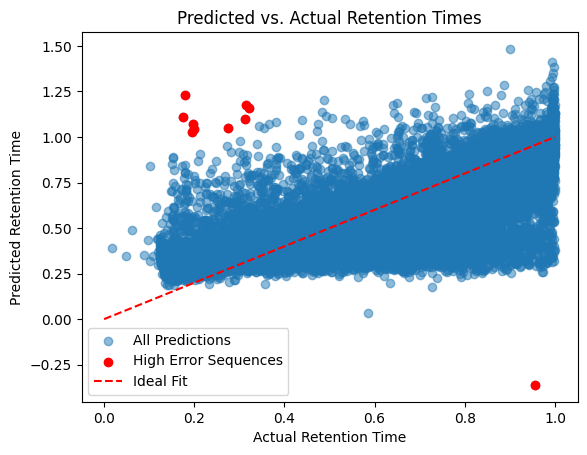


Potential Outlier Sequences (IQR-based):


In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Assume `amino_acids` is the list of amino acids in the correct order
amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 
               'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

# Function to decode a one-hot encoded sequence
def decode_one_hot(one_hot_seq):
    sequence = ""
    for position in one_hot_seq:
        if np.any(position):  # Check if there's a 1 in the one-hot encoding
            amino_acid = amino_acids[np.argmax(position)]
            sequence += amino_acid
        else:
            sequence += "-"  # Add padding for zero vectors (optional)
    return sequence

# Find the largest absolute errors
absolute_errors = np.abs(y_test_pred - y_test)
outlier_indices = np.argsort(absolute_errors)[-10:]  # Top 10 outliers

# Decode the sequences with the largest errors
decoded_sequences = [decode_one_hot(seq) for seq in X_test_seq[outlier_indices]]

# Calculate sequence lengths
sequence_lengths = [len(seq.replace("-", "")) for seq in decoded_sequences]
print("Sequence lengths:", sequence_lengths)

# Display sequences with the largest errors
for i, idx in enumerate(outlier_indices):
    print(f"Sequence {decoded_sequences[i]}: Predicted = {y_test_pred[idx]}, Actual = {y_test[idx]}, Error = {absolute_errors[idx]}")

# Visualize predictions with high errors highlighted
plt.scatter(y_test, y_test_pred, alpha=0.5, label="All Predictions")
plt.scatter(y_test[outlier_indices], y_test_pred[outlier_indices], color='red', label="High Error Sequences")
plt.plot([0, 1], [0, 1], 'r--', label="Ideal Fit")
plt.xlabel("Actual Retention Time")
plt.ylabel("Predicted Retention Time")
plt.legend()
plt.title("Predicted vs. Actual Retention Times")
plt.show()

# Identify potential outliers using IQR
Q1 = np.percentile(y_test, 25)
Q3 = np.percentile(y_test, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = np.where((y_test < lower_bound) | (y_test > upper_bound))[0]

# Decode outlier sequences
outlier_decoded_sequences = [decode_one_hot(X_test_seq[idx]) for idx in outliers]

print("\nPotential Outlier Sequences (IQR-based):")
for idx, seq in zip(outliers, outlier_decoded_sequences):
    print(f"Sequence {seq}: Actual = {y_test[idx]}, Predicted = {y_test_pred[idx]}, Error = {absolute_errors[idx]}")



In [64]:
print("Original y_test shape:", y_test.shape)
print("Original y_pred shape:", y_pred.shape)


print("Shape of X_test_seq:", X_test_seq.shape)  # Ensure it matches your expected test data size

def denormalize(values, original_min, original_max):
    if len(values) == 0:
        print("Input array is empty. Cannot denormalize.")
        return np.array([])  # Return empty array if input is empty
    return values * (original_max - original_min) + original_min

if y_test_denormalized.size == 0 or y_pred_denormalized.size == 0:
    raise ValueError("y_test or y_pred is empty. Cannot generate the plot.")


# Original min and max values from the data before normalization
original_min = 0.0343385
original_max = 60.026

# Denormalization function
def denormalize(values, original_min, original_max):
    if len(values) == 0:
        print("Input array is empty. Cannot denormalize.")
        return np.array([])  # Return empty array if input is empty
    return values * (original_max - original_min) + original_min

# Verify y_test and y_pred shapes
print("Original y_test shape:", y_test.shape)
print("Original y_pred shape:", y_pred.shape)

# Check if y_test and y_pred are empty
if y_test.size == 0 or y_pred.size == 0:
    raise ValueError("y_test or y_pred is empty. Check the dataset preparation step.")

# Denormalize y_test and y_pred
y_test_denormalized = denormalize(y_test, original_min, original_max)
y_pred_denormalized = denormalize(y_pred, original_min, original_max)

# Ensure y_test_denormalized and y_pred_denormalized are valid
print("Denormalized y_test shape:", y_test_denormalized.shape)
print("Denormalized y_pred shape:", y_pred_denormalized.shape)

# Ensure both arrays have the same size
assert y_test_denormalized.shape == y_pred_denormalized.shape, (
    f"Shape mismatch: y_test {y_test_denormalized.shape}, y_pred {y_pred_denormalized.shape}"
)

# Combine actual and predicted values for density estimation
xy = np.vstack([y_test_denormalized, y_pred_denormalized])
z = gaussian_kde(xy)(xy)  # Estimate density for the data points

# Create the plot
plt.figure(figsize=(8, 6))

# Scatter plot of predictions with density coloring
plt.scatter(
    y_test_denormalized,
    y_pred_denormalized,
    c=z,
    s=10,
    cmap='viridis',
    alpha=0.6,
    label='Predictions'
)

# Overlay a perfect fit line
plt.plot(
    [y_test_denormalized.min(), y_test_denormalized.max()],
    [y_test_denormalized.min(), y_test_denormalized.max()],
    color='red',
    linestyle='--',
    label='Perfect Fit'
)

# Labels and Title
plt.xlabel('True Denormalized Values (Retention Time)')
plt.ylabel('Predicted Denormalized Values (Retention Time)')
plt.title('Predicted vs. Actual Denormalized Values')

# Add a box with Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test_denormalized - y_pred_denormalized))
plt.text(
    0.05, 0.95, f'MAE (Test): {mae:.4f}', transform=plt.gca().transAxes,
    fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue')
)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(alpha=0.3)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()




Original y_test shape: (0,)
Original y_pred shape: (89490,)
Shape of X_test_seq: (89490, 58, 20)


ValueError: y_test or y_pred is empty. Cannot generate the plot.